> # 미세먼지 발생량에 따른 카드매출 영향 거시 분석

- 와이즈넛 미세먼지 관련 SNS 데이터(뉴스, 블로그, 카페)
- 신한카드 카드매출 데이터

## 패키지

In [72]:
# 분석 패키지
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from sklearn.preprocessing import *
from datetime import datetime, timedelta

import os
import glob

# 시각화 패키지
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False
# 폰트 설정
font_location = 'C:/Windows/Fonts/malgunbd.ttf'
font_name = fm.FontProperties(fname = font_location).get_name()
mpl.rc('font', family = font_name)

## 데이터셋

In [74]:
path = 'Rawdata/SNS데이터/'
allFiles = glob.glob(os.path.join(path+"*.xlsx"))

np_array_list = []
comb_np_array = []
for file_ in allFiles:
    df = pd.read_excel(file_,encoding="utf-8")
    np_array_list.append(df.as_matrix())
    print(file_)

comb_np_array = np.vstack(np_array_list)
df_sns = pd.DataFrame(comb_np_array)
df_sns.columns = df.columns

df_sns['DATE'] = pd.to_datetime(df_sns['DATE'], format='%Y%m%d%H%M%S')
df_sns['DATE'] = df_sns['DATE'].dt.strftime('%Y-%m-%d') ## 날짜만 선택하기

C:\anaconda3\envs\python36\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Rawdata/SNS데이터\SNS_1.xlsx
Rawdata/SNS데이터\SNS_2.xlsx
Rawdata/SNS데이터\SNS_3.xlsx
Rawdata/SNS데이터\SNS_4.xlsx
Rawdata/SNS데이터\SNS_5.xlsx
Rawdata/SNS데이터\SNS_6.xlsx
Rawdata/SNS데이터\SNS_7.xlsx
Rawdata/SNS데이터\SNS_8.xlsx


## 데이터 수집 채널 확인

In [76]:
set(df_sns['SECTION'])

{'뉴스', '블로그', '카페'}

## 뉴스 / 블로그 / 카페 데이터 분할

In [78]:
# 데이터 수집 채널 별로 데이터 분할

df_news = df_sns[df_sns['SECTION']=='뉴스']
df_blog = df_sns[df_sns['SECTION']=='블로그']
df_cafe = df_sns[df_sns['SECTION']=='카페']


# 분할 데이터 각각에 대해 날짜 오름차순 정렬

df_news = df_news.sort_values('DATE', ascending=True)
df_blog = df_blog.sort_values('DATE', ascending=True)
df_cafe = df_cafe.sort_values('DATE', ascending=True)


# 분할 데이터 각각에 대해 리인덱싱

df_news.index = range(len(df_news))
df_blog.index = range(len(df_blog))
df_cafe.index = range(len(df_cafe))


# 분할 데이터 각각에 대해 관측치 갯수 출력

print(len(df_news))
print(len(df_blog))
print(len(df_cafe))

189271
302903
285658


## 분할 데이터셋 출력

In [80]:
df_news.head(2)

,DOCID,SECTION,DATE,TITLE,CONTENT
0,203950322,뉴스,2018-04-01,내일날씨 전국 대체로 맑고 미세먼지 보통서울 최저 13도·최고 21도,월요일인 내일2일은 전국이 대체로 맑겠다 1일 기상청에 따르면 내일 남부지방은 대체...
1,203992329,뉴스,2018-04-01,날씨 중부 오후 비 5mm전국 미세먼지 보통,날씨 중부 오후 비 5mm전국 미세먼지 보통’ 맑았던 어제와 달리 오늘은 전국에 구...


In [82]:
df_blog.head(2)

,DOCID,SECTION,DATE,TITLE,CONTENT
0,203984952,블로그,2018-04-01,미세먼지 환기 할까 말까,뷰티정보 미세먼지 환기 할까 말까 미즈김 2018 4 1 1934 URL 복사 이...
1,203963234,블로그,2018-04-01,첫 평양공연; 김정은 깜짝 관람’ 폐비닐 종전대로 정상 수거_20180402_종합,국내 뉴스_20180402_종합 Link 영뮤직03 NAVER KBS전체 ...


In [84]:
df_cafe.head(2)

,DOCID,SECTION,DATE,TITLE,CONTENT
0,204002080,카페,2018-04-01,6살 남아 검도 또는 태권도 추천해주세요,6살 개구쟁이 아들 운동 시켜볼려고합니다 에너지 발산 그리고 좀 차분해지길 바라는ㅜ...
1,204042637,카페,2018-04-01,오늘 미세먼지 심하다했음,헬스갔다오는데 바로 목 붓고 몸살오네ㄷㄷ


## 수집 채널에 따른 일별 언급량 수 계산

In [86]:
daily_news = df_news.groupby('DATE')['DOCID'].count().to_frame().reset_index()
daily_blog = df_blog.groupby('DATE')['DOCID'].count().to_frame().reset_index()
daily_cafe = df_cafe.groupby('DATE')['DOCID'].count().to_frame().reset_index()

daily_news.columns = ['DATE', 'NEWS']
daily_blog.columns = ['DATE', 'BLOG']
daily_cafe.columns = ['DATE', 'CAFE']

In [88]:
plot = df_news.groupby('DATE')['DOCID'].count().to_frame().reset_index()
plot['DATE'] = pd.to_datetime(plot['DATE'])
plot.index = plot['DATE']

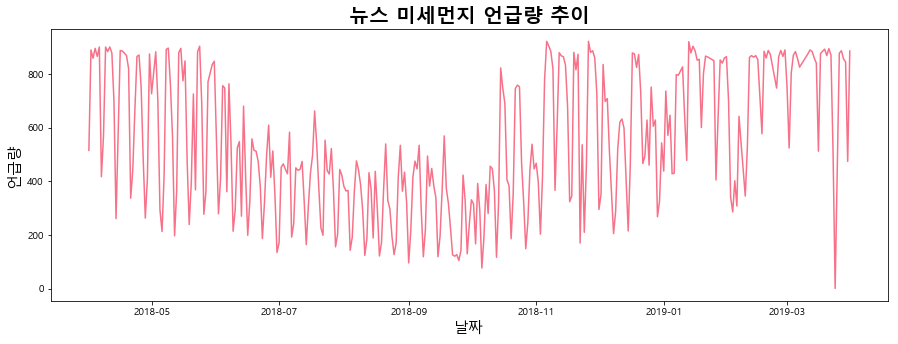

In [89]:
plt.figure(figsize=(15, 5))
plt.title('뉴스 미세먼지 언급량 추이', weight='bold', size=20)
plt.plot(plot['DOCID'])
plt.xlabel('날짜', size=15)
plt.ylabel('언급량', size=15)
plt.savefig('img/News_Time_Series.png')

plt.show()

In [90]:
df_sum = pd.merge(daily_news, daily_blog, how='left')
df_sum = pd.merge(df_sum, daily_cafe, how='left')

df_sum['DATE'] = pd.to_datetime(df_sum['DATE'])
df_sum.head()

,DATE,NEWS,BLOG,CAFE
0,2018-04-01,515,977,940
1,2018-04-02,889,974,961
2,2018-04-03,858,970,952
3,2018-04-04,895,965,951
4,2018-04-05,865,106,948


In [91]:
# 쿼터 변수 생성
df_sum['QT'] = 0
df_sum.loc[df_sum['DATE']>='2018-04-01', 'QT'] = 2
df_sum.loc[df_sum['DATE']>='2018-07-01', 'QT'] = 3
df_sum.loc[df_sum['DATE']>='2018-10-01', 'QT'] = 4
df_sum.loc[df_sum['DATE']>='2019-01-01', 'QT'] = 1

C:\anaconda3\envs\python36\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\anaconda3\envs\python36\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


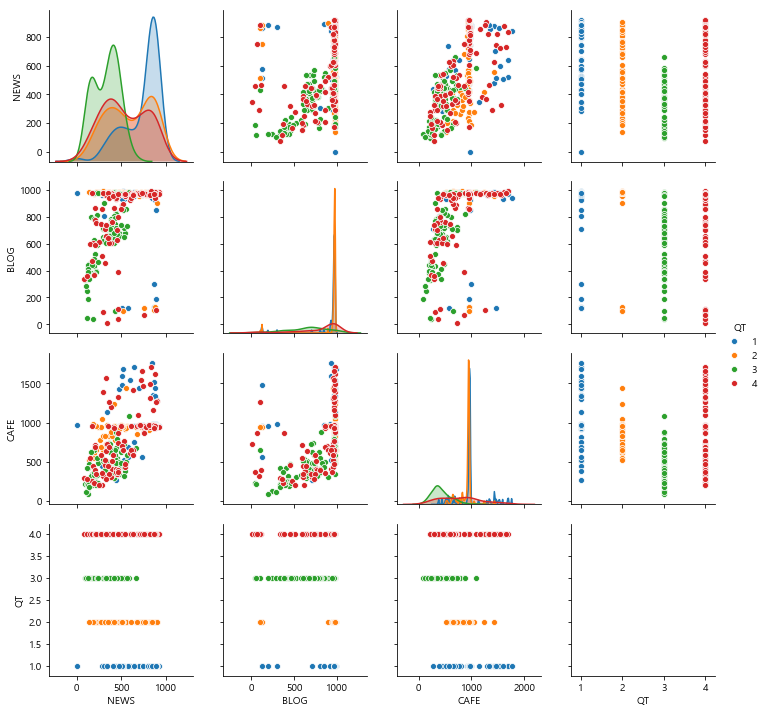

In [11]:
# 쿼터에 따른 페어 플롯
sns.pairplot(df_sum, hue='QT')
plt.show()

## 카드매출 데이터셋


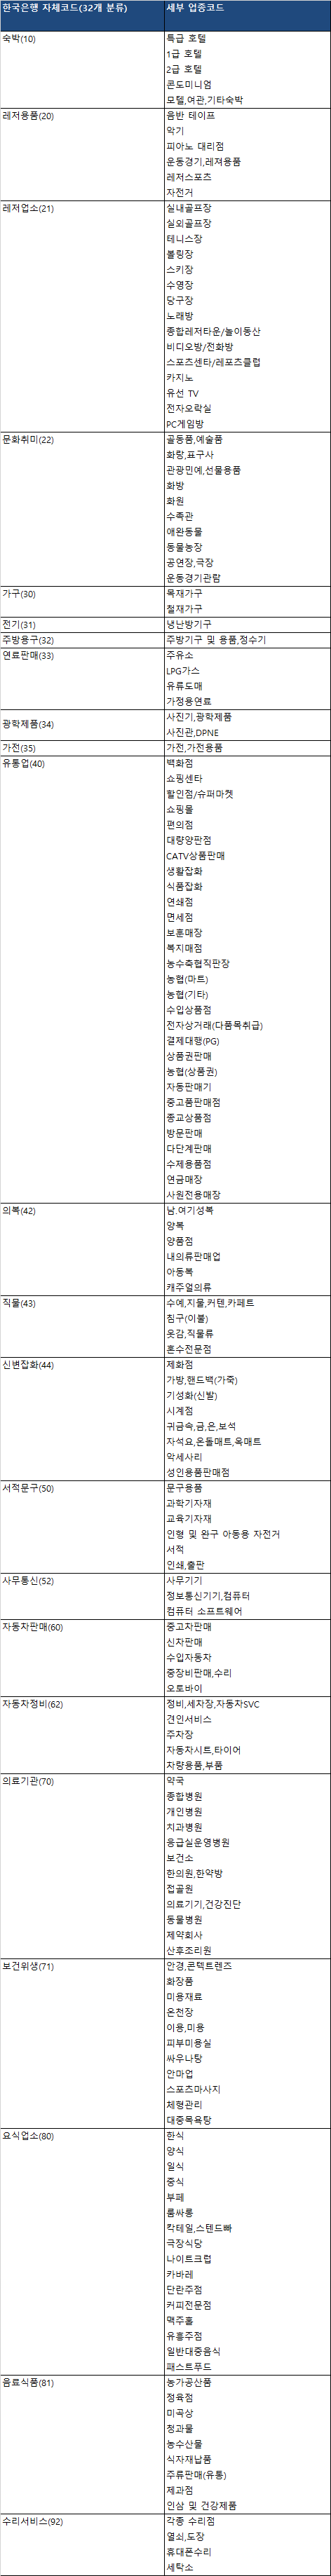

In [12]:
df_card = pd.read_csv('Rawdata/카드매출데이터/CARD_SPENDING_190809.txt', sep='\t')
df_card.head(2)

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT
0,20180401,110,515,21,F,30,4,180
1,20180401,110,515,21,F,55,4,22


In [13]:
# 23개 카드매출 카테고리
mct_cat_list = list(set(df_card['MCT_CAT_CD']))
print(mct_cat_list)

[10, 20, 21, 22, 30, 31, 32, 33, 34, 35, 40, 42, 43, 44, 50, 52, 60, 62, 70, 71, 80, 81, 92]


In [14]:
# 2개 지역구 카테고리
mct_gu_list = list(set(df_card['GU_CD']))
print(mct_gu_list)

# 350 : 노원구
# 110 : 종로구

[350, 110]


## 종로, 노원 합산 일일 카드매출(23개 카테고리) 금액

In [15]:
daily_card = df_card.groupby(['MCT_CAT_CD', 'STD_DD'])['USE_AMT'].sum().to_frame().reset_index()
daily_card['STD_DD'] = pd.to_datetime(daily_card['STD_DD'], format='%Y%m%d')
daily_card.head(2)

,MCT_CAT_CD,STD_DD,USE_AMT
0,10,2018-04-01,171130
1,10,2018-04-02,93369


## 일별 데이터 집계

In [16]:
date_list = pd.date_range(start='2018-04-01', end='2019-03-31')
daily_cat_card = pd.DataFrame({'DATE':date_list})
for cd in mct_cat_list:
     
    temp = pd.DataFrame({'DATE' : daily_card[daily_card['MCT_CAT_CD']==cd]['STD_DD'],
                        'MCT_CAT_CD_'+str(cd) : daily_card[daily_card['MCT_CAT_CD']==cd]['USE_AMT']})
    daily_cat_card = pd.merge(daily_cat_card, temp, how='left')
    
    
daily_cat_card

,DATE,MCT_CAT_CD_10,MCT_CAT_CD_20,MCT_CAT_CD_21,MCT_CAT_CD_22,MCT_CAT_CD_30,MCT_CAT_CD_31,MCT_CAT_CD_32,MCT_CAT_CD_33,MCT_CAT_CD_34,...,MCT_CAT_CD_44,MCT_CAT_CD_50,MCT_CAT_CD_52,MCT_CAT_CD_60,MCT_CAT_CD_62,MCT_CAT_CD_70,MCT_CAT_CD_71,MCT_CAT_CD_80,MCT_CAT_CD_81,MCT_CAT_CD_92
0,2018-04-01,171130,160087,237997,111126,21890.0,48.0,4859.0,385830,20223,...,234150,877765,6164,NaN,58723,480860,414979,4426221,268343,13693
1,2018-04-02,93369,168191,387279,62209,3449.0,5245.0,11104.0,438545,9887,...,275054,660377,34680,10784.0,182590,3611520,356803,3724023,384269,51630
2,2018-04-03,116075,234052,332154,66058,10749.0,4551.0,20670.0,392441,10826,...,191815,570384,14012,42376.0,107212,3492940,336282,4065049,316704,51240
3,2018-04-04,84254,143845,302737,90335,15254.0,1962.0,7101.0,413563,21374,...,172254,588266,16757,1770.0,133178,3238880,372022,4264059,304194,56250
4,2018-04-05,106643,179423,232636,74715,13973.0,2092.0,8696.0,387197,10605,...,150335,535284,23751,8384.0,92224,3121823,351359,3971589,297745,25145
5,2018-04-06,90252,156189,275030,84790,27336.0,9044.0,11506.0,447117,12976,...,217203,631955,23706,2818.0,125819,3234259,393866,4675913,335913,37910
6,2018-04-07,151721,224016,268116,140930,55340.0,5197.0,4886.0,506094,18767,...,300158,927713,12410,3338.0,119532,2231640,522211,5669814,389191,52512
7,2018-04-08,129042,96942,223327,109198,28059.0,1025.0,1234.0,390957,19817,...,188515,814892,1089,NaN,41946,505937,356075,4228788,282438,7689
8,2018-04-09,91742,99349,269440,47317,8467.0,2825.0,34498.0,462981,16898,...,181044,583156,29588,3491.0,138808,3782341,353590,3663963,291630,51584
9,2018-04-10,69277,138831,257870,73362,9937.0,28021.0,14639.0,436395,17889,...,154189,525614,23332,6136.0,124636,3362107,307022,4036713,300431,29292


In [17]:
# 결측치 처리
daily_cat_card = daily_cat_card.fillna(0)
daily_cat_card.isna().sum().to_frame()

,0
DATE,0
MCT_CAT_CD_10,0
MCT_CAT_CD_20,0
MCT_CAT_CD_21,0
MCT_CAT_CD_22,0
MCT_CAT_CD_30,0
MCT_CAT_CD_31,0
MCT_CAT_CD_32,0
MCT_CAT_CD_33,0
MCT_CAT_CD_34,0


## 병합

In [18]:
df_sum = pd.merge(df_sum, daily_cat_card, how='left', on='DATE')
df_sum.head()

,DATE,NEWS,BLOG,CAFE,QT,MCT_CAT_CD_10,MCT_CAT_CD_20,MCT_CAT_CD_21,MCT_CAT_CD_22,MCT_CAT_CD_30,...,MCT_CAT_CD_44,MCT_CAT_CD_50,MCT_CAT_CD_52,MCT_CAT_CD_60,MCT_CAT_CD_62,MCT_CAT_CD_70,MCT_CAT_CD_71,MCT_CAT_CD_80,MCT_CAT_CD_81,MCT_CAT_CD_92
0,2018-04-01,515,977,940,2,171130,160087,237997,111126,21890.0,...,234150,877765,6164,0.0,58723,480860,414979,4426221,268343,13693
1,2018-04-02,889,974,961,2,93369,168191,387279,62209,3449.0,...,275054,660377,34680,10784.0,182590,3611520,356803,3724023,384269,51630
2,2018-04-03,858,970,952,2,116075,234052,332154,66058,10749.0,...,191815,570384,14012,42376.0,107212,3492940,336282,4065049,316704,51240
3,2018-04-04,895,965,951,2,84254,143845,302737,90335,15254.0,...,172254,588266,16757,1770.0,133178,3238880,372022,4264059,304194,56250
4,2018-04-05,865,106,948,2,106643,179423,232636,74715,13973.0,...,150335,535284,23751,8384.0,92224,3121823,351359,3971589,297745,25145


## 상관분석

In [19]:
corr = df_sum.corr(method = 'pearson')
corr

,NEWS,BLOG,CAFE,QT,MCT_CAT_CD_10,MCT_CAT_CD_20,MCT_CAT_CD_21,MCT_CAT_CD_22,MCT_CAT_CD_30,MCT_CAT_CD_31,...,MCT_CAT_CD_44,MCT_CAT_CD_50,MCT_CAT_CD_52,MCT_CAT_CD_60,MCT_CAT_CD_62,MCT_CAT_CD_70,MCT_CAT_CD_71,MCT_CAT_CD_80,MCT_CAT_CD_81,MCT_CAT_CD_92
NEWS,1.000000,0.410332,0.635740,-0.360743,-0.514924,-0.045696,0.263494,-0.419702,-0.246097,0.192526,...,-0.197311,-0.311432,0.337898,0.208427,0.045295,0.518194,-0.210897,-0.321636,0.042419,0.282047
BLOG,0.410332,1.000000,0.514832,-0.264870,-0.205425,0.062671,0.130543,-0.178351,-0.134064,0.078485,...,0.013769,-0.151486,0.107950,0.099035,0.044089,0.216500,0.053608,-0.039614,0.056322,0.226571
CAFE,0.635740,0.514832,1.000000,-0.344465,-0.129476,0.216424,0.182042,-0.121388,-0.079860,0.081764,...,0.137436,-0.102289,0.139455,0.124872,0.094239,0.312767,0.120528,0.111141,0.121913,0.314026
QT,-0.360743,-0.264870,-0.344465,1.000000,0.075890,0.109657,-0.187649,0.033131,0.001643,0.065407,...,0.135316,-0.138590,-0.019998,-0.070285,0.096371,-0.028881,-0.061467,0.054380,-0.063205,-0.031585
MCT_CAT_CD_10,-0.514924,-0.205425,-0.129476,0.075890,1.000000,0.255529,-0.107981,0.640752,0.273785,-0.143627,...,0.336019,0.639112,-0.358457,-0.178227,-0.050370,-0.492022,0.438611,0.672629,0.098795,-0.088874
MCT_CAT_CD_20,-0.045696,0.062671,0.216424,0.109657,0.255529,1.000000,0.399303,0.248954,0.175127,0.163370,...,0.567432,0.215614,0.136930,0.181073,0.541880,0.207752,0.597199,0.603599,0.378933,0.409344
MCT_CAT_CD_21,0.263494,0.130543,0.182042,-0.187649,-0.107981,0.399303,1.000000,-0.145489,-0.153892,0.265848,...,0.241251,0.075462,0.488630,0.273877,0.600553,0.603519,0.343110,0.122291,0.311104,0.397330
MCT_CAT_CD_22,-0.419702,-0.178351,-0.121388,0.033131,0.640752,0.248954,-0.145489,1.000000,0.342859,-0.129796,...,0.297060,0.511353,-0.345019,-0.160817,-0.045900,-0.457742,0.411604,0.638728,0.097254,-0.080658
MCT_CAT_CD_30,-0.246097,-0.134064,-0.079860,0.001643,0.273785,0.175127,-0.153892,0.342859,1.000000,-0.097086,...,0.259545,0.282472,-0.278425,-0.134998,-0.063371,-0.384246,0.259907,0.313577,-0.058608,-0.144548
MCT_CAT_CD_31,0.192526,0.078485,0.081764,0.065407,-0.143627,0.163370,0.265848,-0.129796,-0.097086,1.000000,...,0.069150,-0.096623,0.167494,0.139215,0.269600,0.347866,0.040362,0.004740,0.088573,0.212839


## 뉴스 분석

In [20]:
corr['NEWS'].to_frame().sort_values('NEWS', ascending=False)

,NEWS
NEWS,1.000000
CAFE,0.635740
MCT_CAT_CD_70,0.518194
BLOG,0.410332
MCT_CAT_CD_52,0.337898
MCT_CAT_CD_92,0.282047
MCT_CAT_CD_21,0.263494
MCT_CAT_CD_32,0.247718
MCT_CAT_CD_60,0.208427
MCT_CAT_CD_31,0.192526


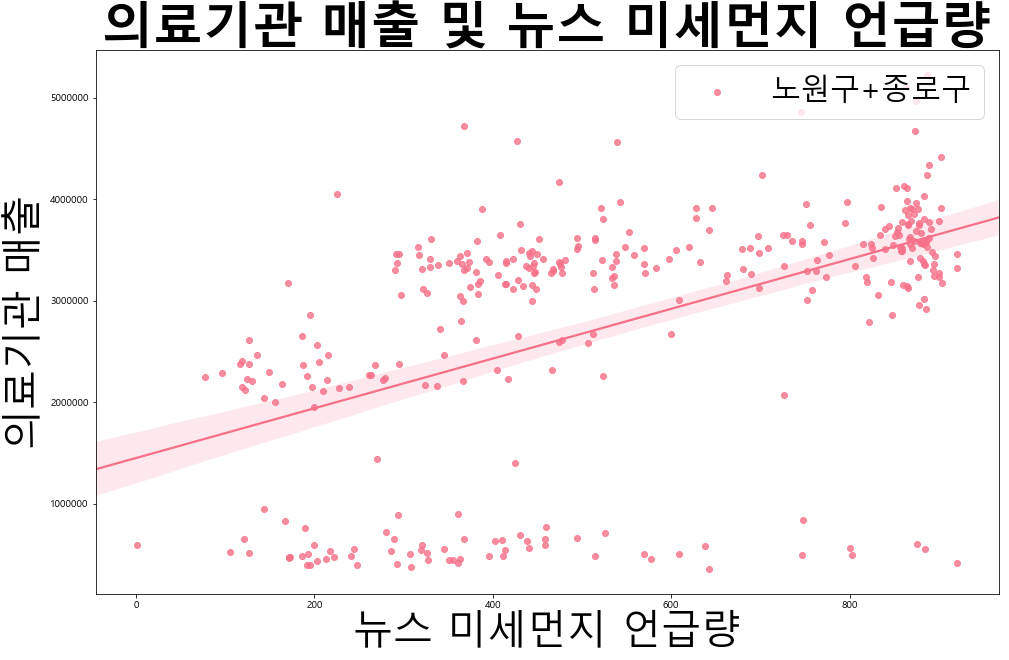

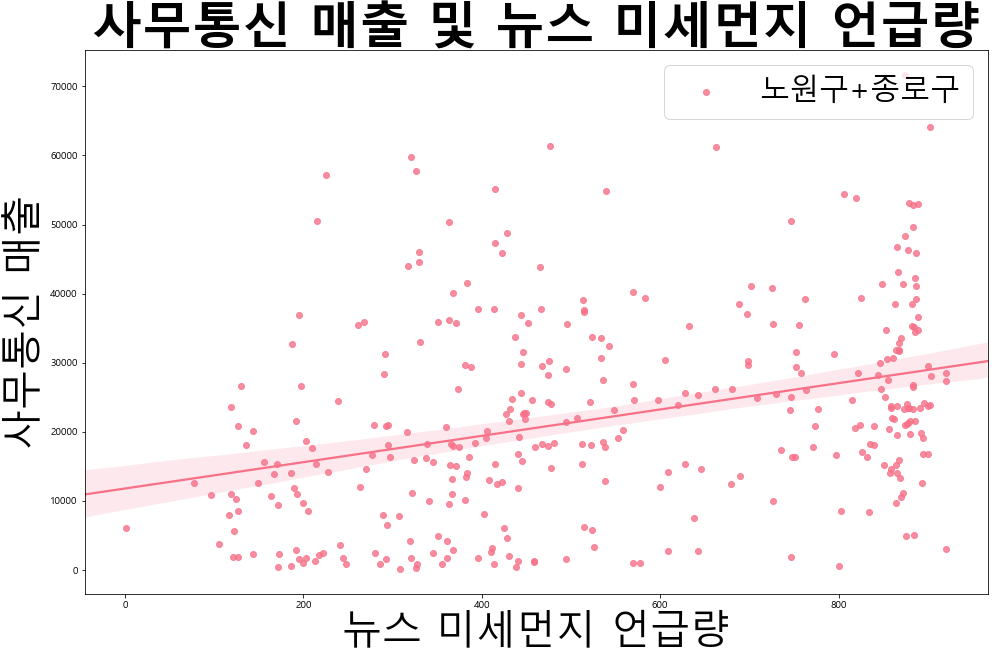

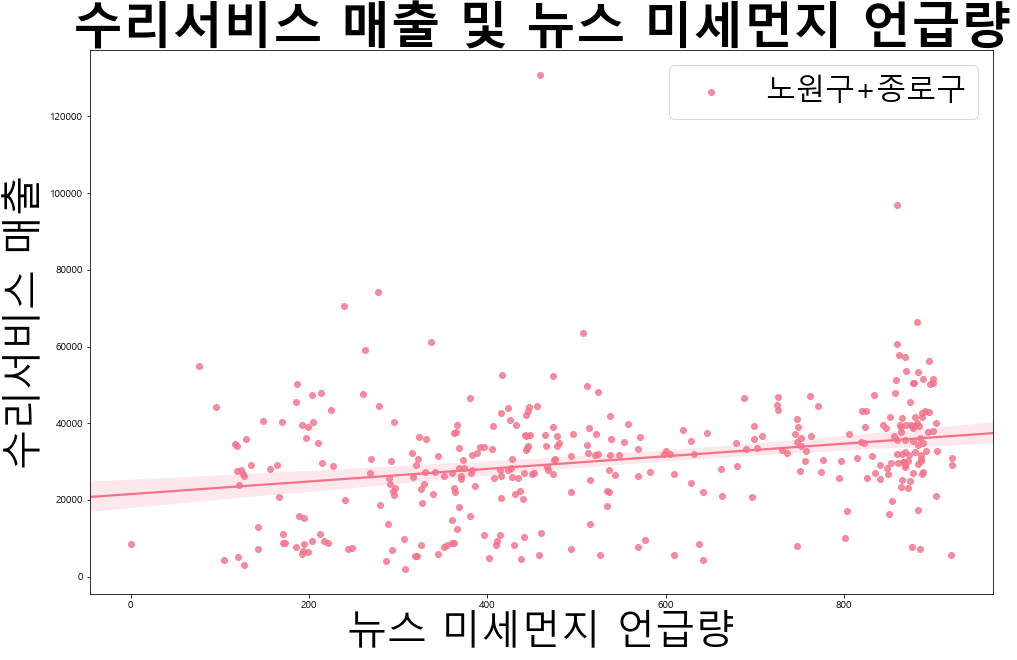

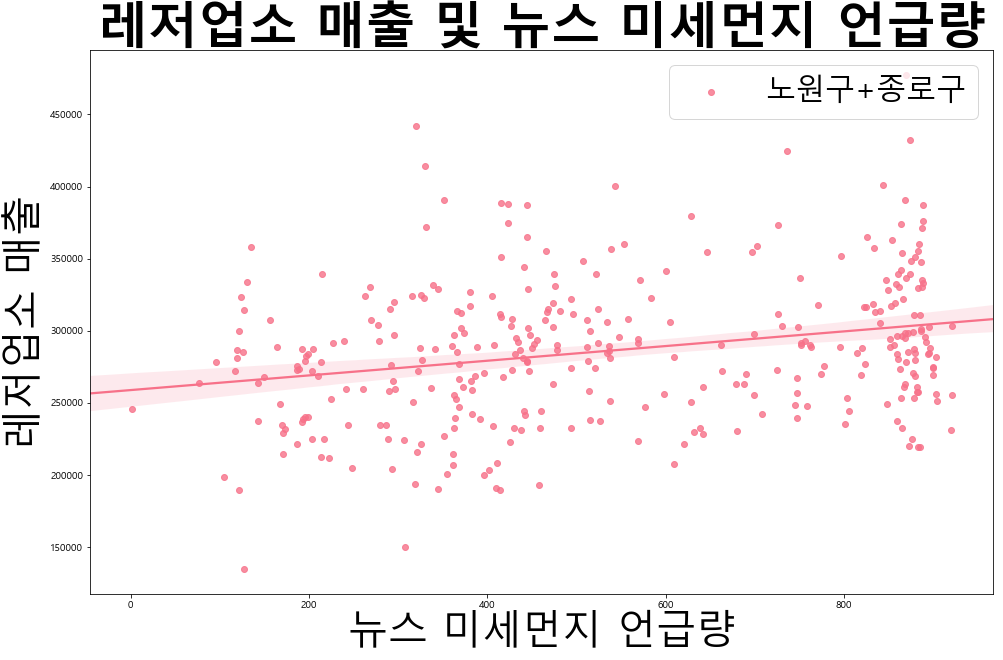

In [63]:
positive_list = {'MCT_CAT_CD_70' : '의료기관 매출', 
                 'MCT_CAT_CD_52' : '사무통신 매출',
                 'MCT_CAT_CD_92' : '수리서비스 매출',
                 'MCT_CAT_CD_21' : '레저업소 매출'}

sns.set_palette("husl")

for i in positive_list:
    
    plt.figure(figsize=[16.18, 10])    
    plt.title(positive_list[i]+' 및 뉴스 미세먼지 언급량', weight='bold', size=50)
    
    sns.regplot(x=df_sum['NEWS'], y=df_sum[i], label='노원구+종로구')
    
    
    plt.legend(loc='upper right', fontsize=30)
    
    plt.xlabel('뉴스 미세먼지 언급량', size=40)
    plt.ylabel(positive_list[i], size=40)

    
    plt.savefig('img/NEWS_'+positive_list[i]+'.png')
    
    plt.show()

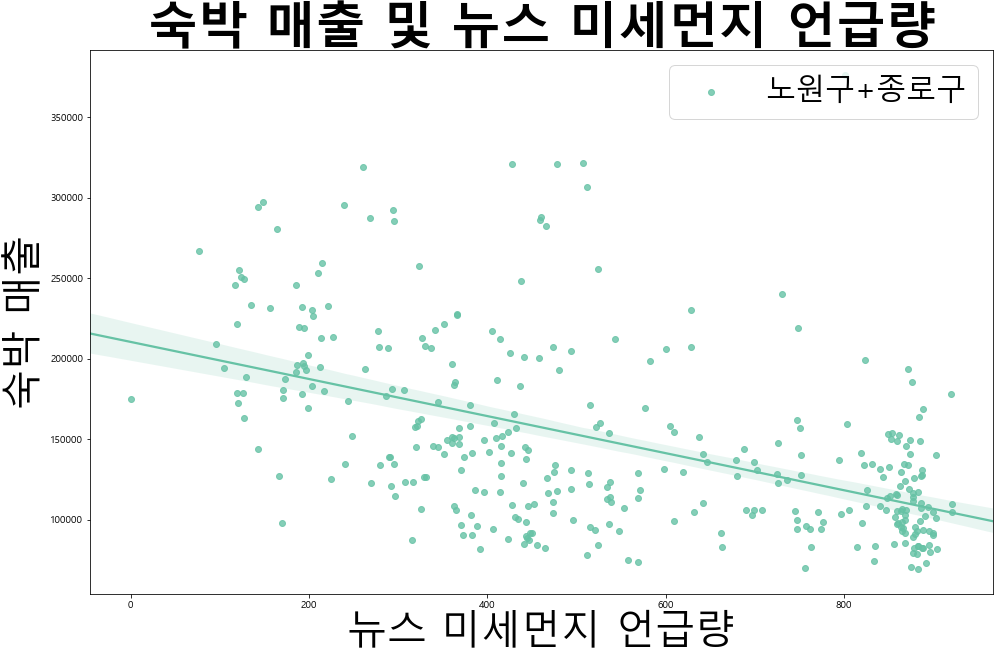

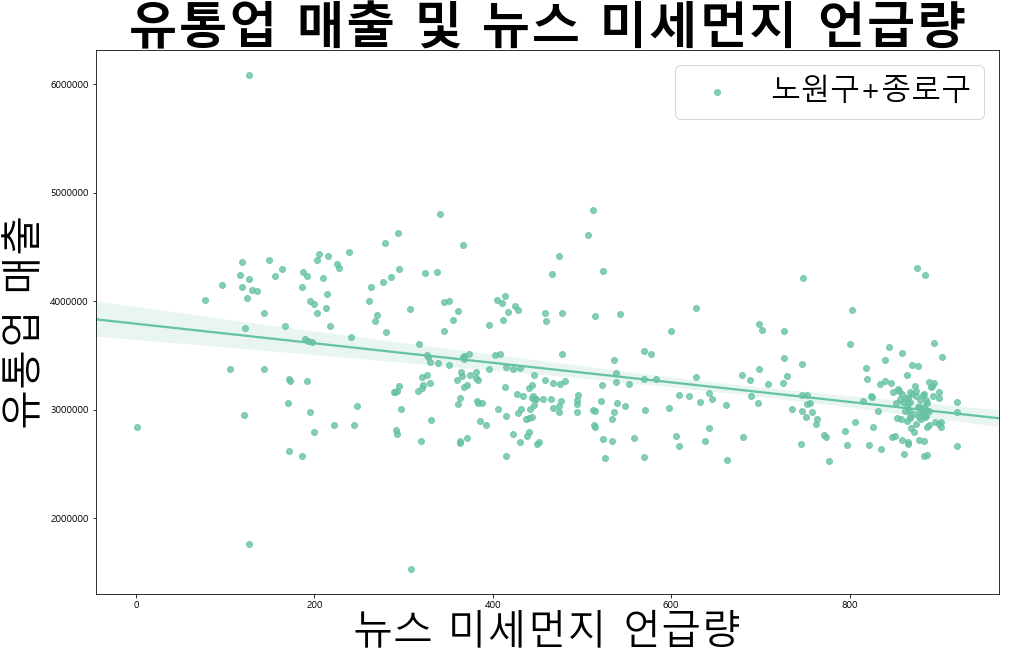

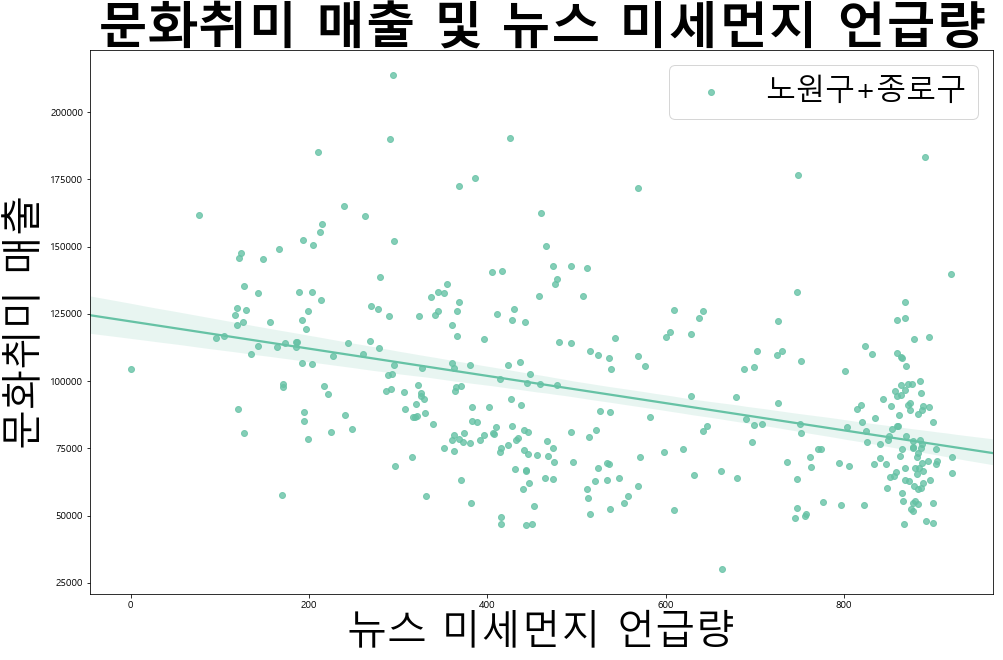

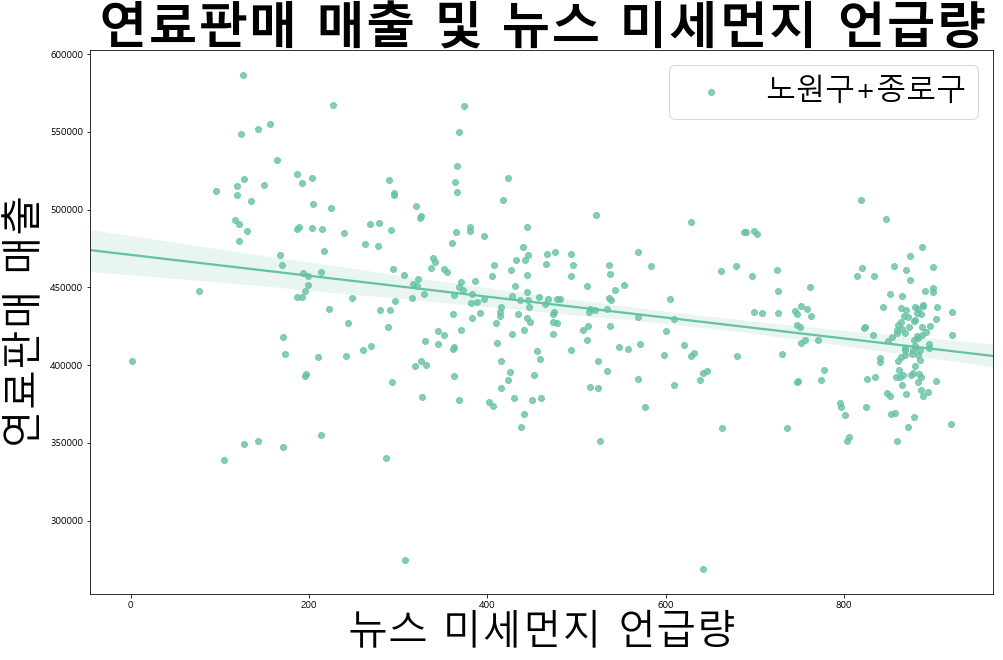

In [64]:
negative_list = {'MCT_CAT_CD_10' : '숙박 매출', 
                 'MCT_CAT_CD_40' : '유통업 매출', 
                 'MCT_CAT_CD_22' : '문화취미 매출', 
                 'MCT_CAT_CD_33' : '연료판매 매출'}

sns.set_palette("Set2")

for i in negative_list:
    
    plt.figure(figsize=[16.18, 10])    
    plt.title(negative_list[i]+' 및 뉴스 미세먼지 언급량', weight='bold', size=50)
    
    sns.regplot(x=df_sum['NEWS'], y=df_sum[i], label='노원구+종로구')
    
    
    plt.legend(loc='upper right', fontsize=30)
    plt.xlabel('뉴스 미세먼지 언급량', size=40)
    plt.ylabel(negative_list[i], size=40)
    
    plt.savefig('img/NEWS_'+negative_list[i]+'.png')
    
    plt.show()

## 블로그 분석

In [24]:
corr['BLOG'].to_frame().sort_values('BLOG', ascending=False)

,BLOG
BLOG,1.000000
CAFE,0.514832
NEWS,0.410332
MCT_CAT_CD_92,0.226571
MCT_CAT_CD_70,0.216500
MCT_CAT_CD_21,0.130543
MCT_CAT_CD_32,0.109431
MCT_CAT_CD_52,0.107950
MCT_CAT_CD_60,0.099035
MCT_CAT_CD_31,0.078485


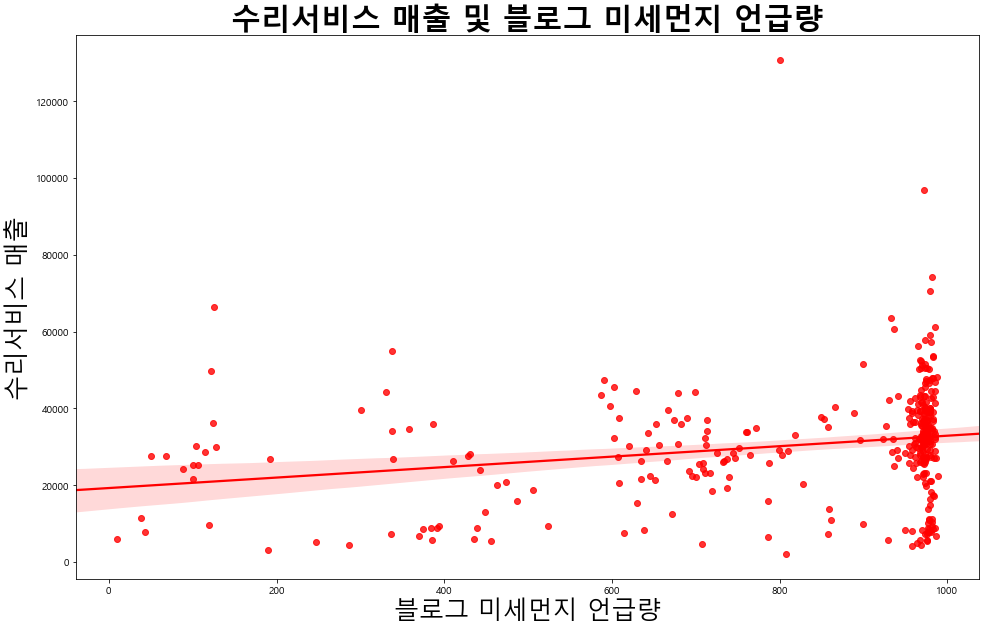

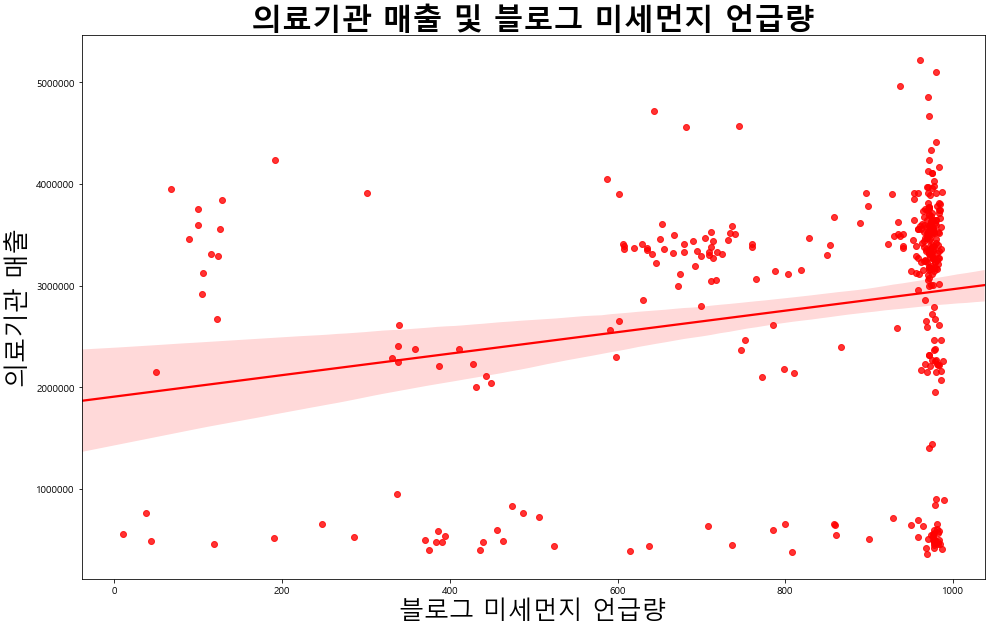

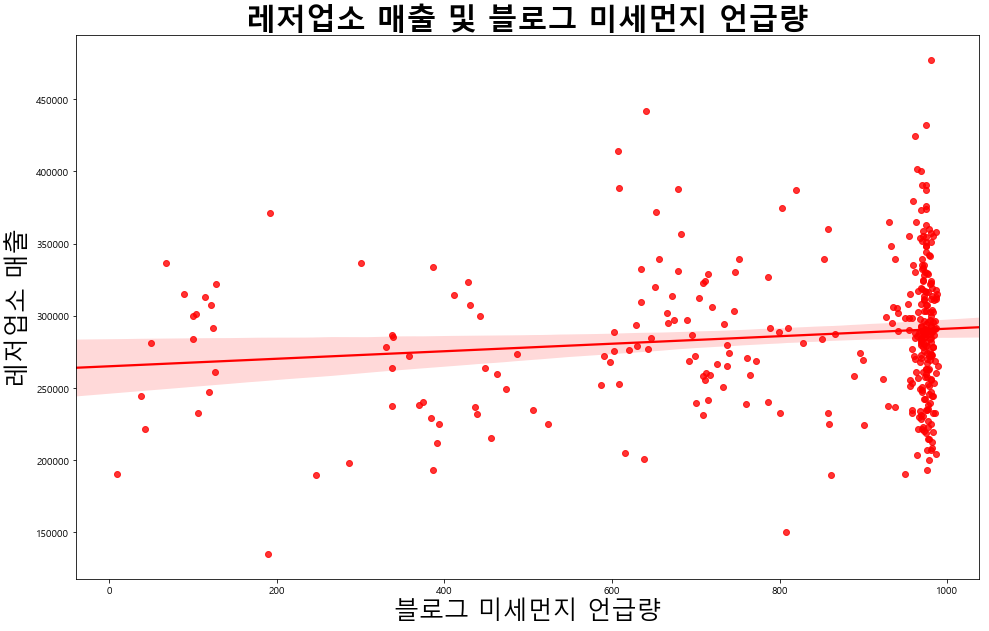

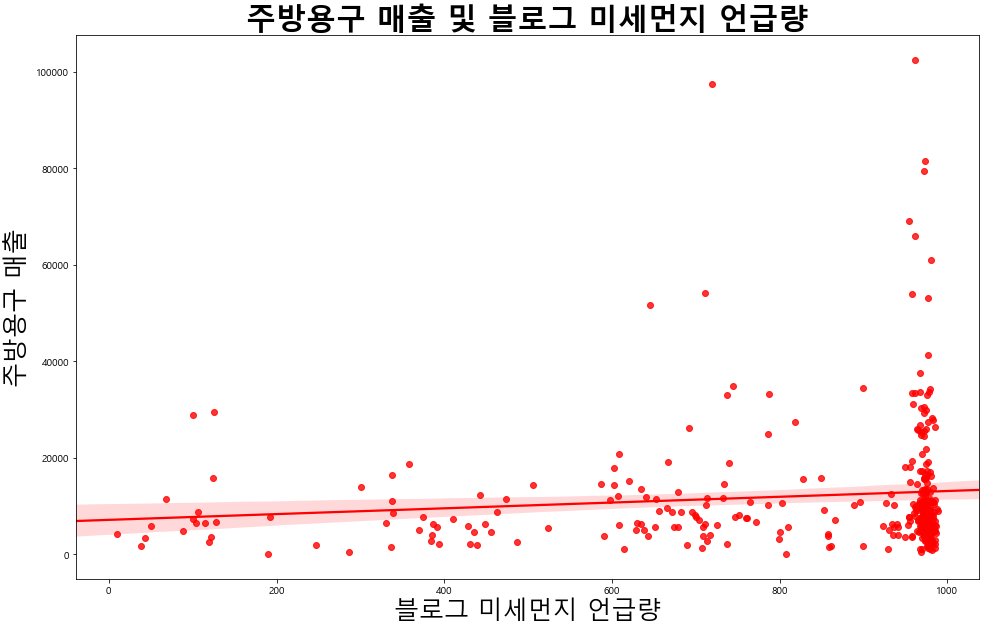

In [25]:
positive_list = {'MCT_CAT_CD_92' : '수리서비스 매출', 
                 'MCT_CAT_CD_70' : '의료기관 매출',
                 'MCT_CAT_CD_21' : '레저업소 매출',
                 'MCT_CAT_CD_32' : '주방용구 매출'}

for i in positive_list:
    
    plt.figure(figsize=[16.18, 10])    
    plt.title(positive_list[i]+' 및 블로그 미세먼지 언급량', weight='bold', size=30)
    
    sns.regplot(x=df_sum['BLOG'], y=df_sum[i], color='red')
    
    plt.xlabel('블로그 미세먼지 언급량', size=25)
    plt.ylabel(positive_list[i], size=25)

    
    # plt.savefig('img/BLOG_'+positive_list[i]+'.png')
    
    plt.show()
    


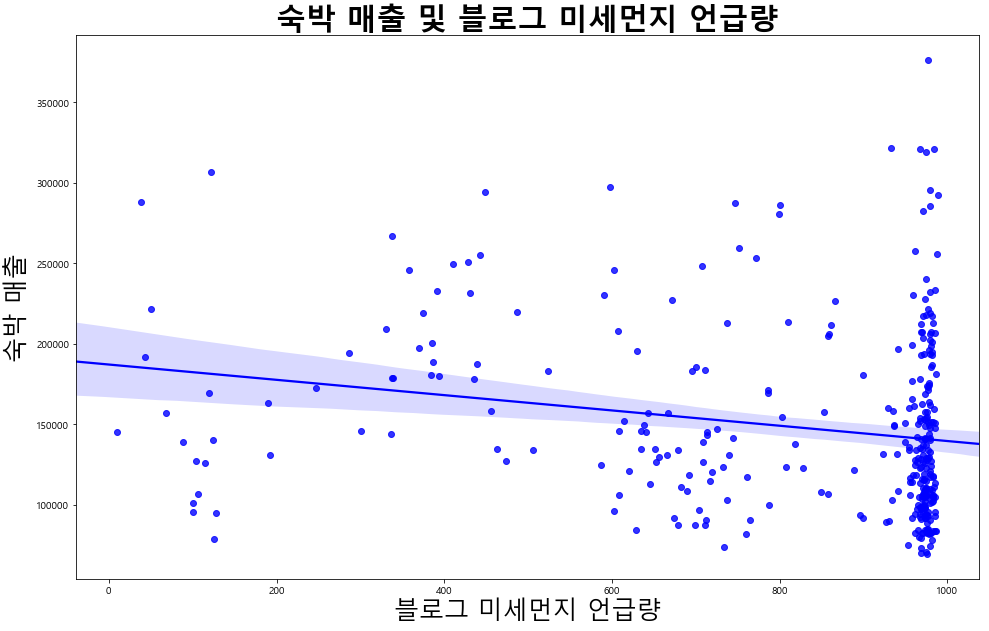

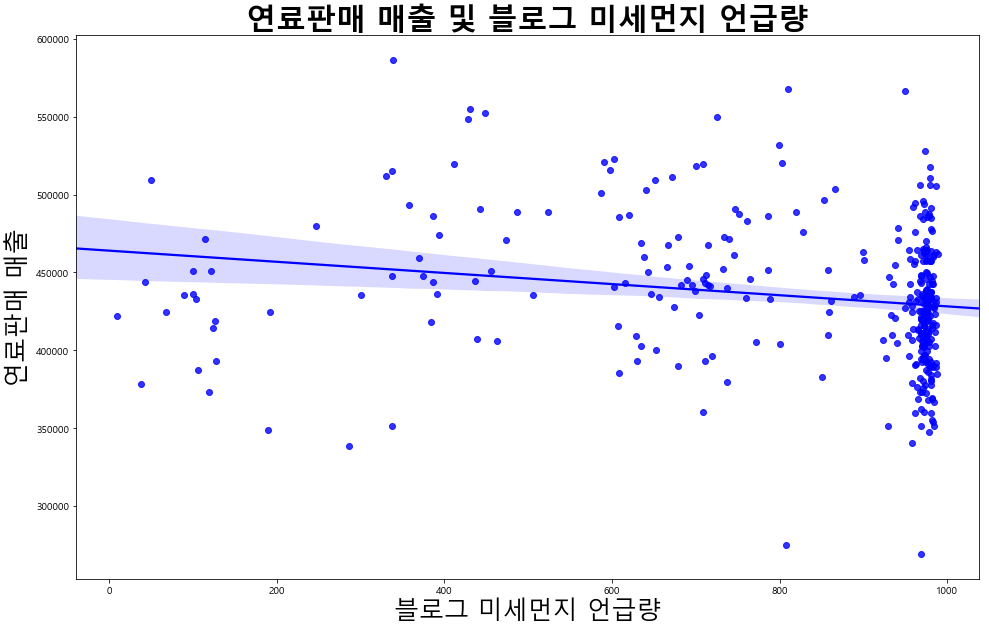

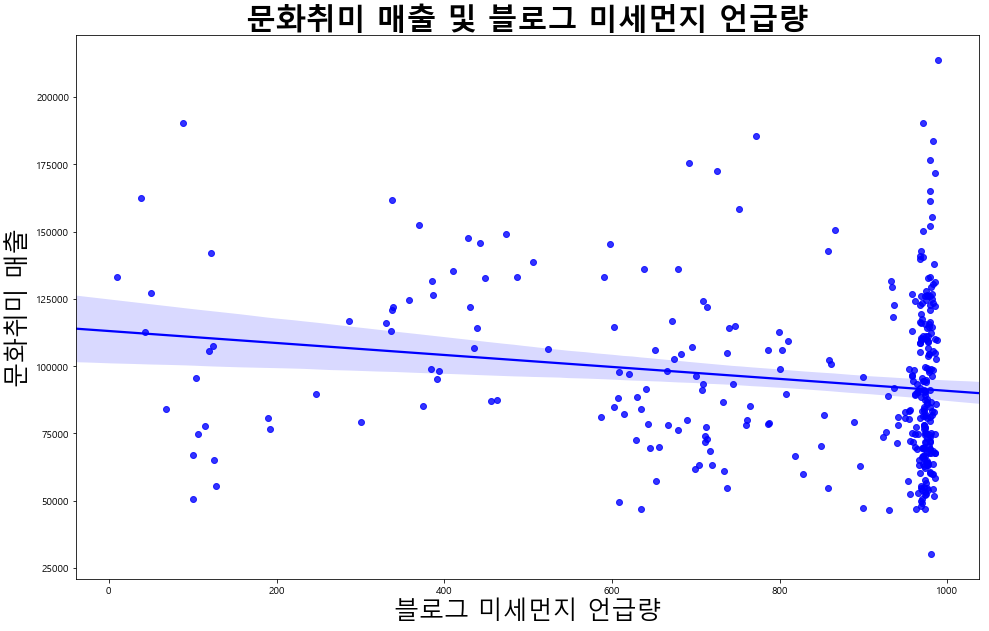

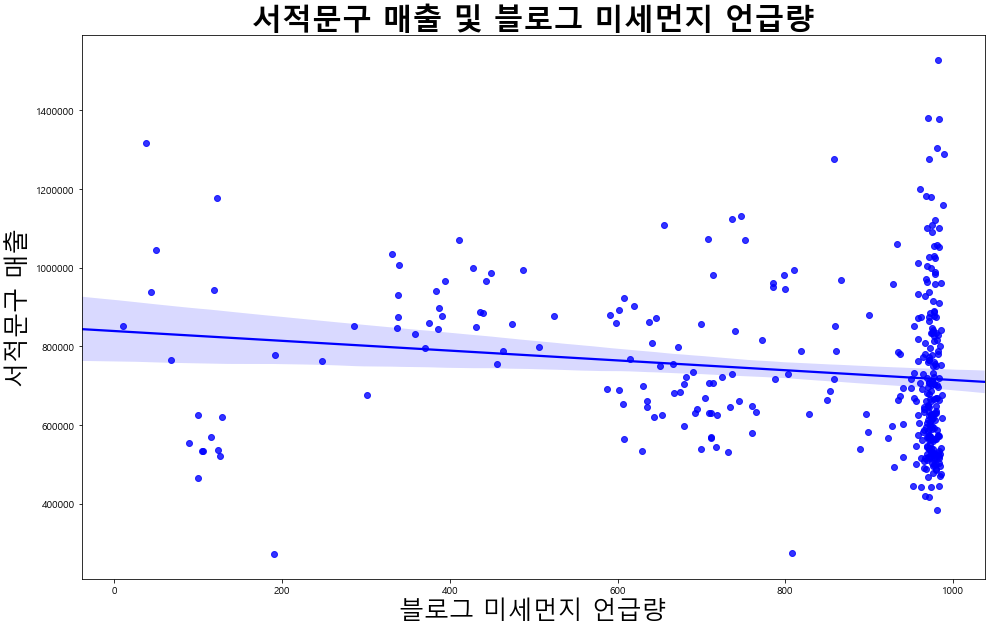

In [26]:
negative_list = {'MCT_CAT_CD_10' : '숙박 매출', 
                 'MCT_CAT_CD_33' : '연료판매 매출', 
                 'MCT_CAT_CD_22' : '문화취미 매출', 
                 'MCT_CAT_CD_50' : '서적문구 매출'}

for i in negative_list:
    
    plt.figure(figsize=[16.18, 10])    
    plt.title(negative_list[i]+' 및 블로그 미세먼지 언급량', weight='bold', size=30)
    
    sns.regplot(x=df_sum['BLOG'], y=df_sum[i], color='blue')
    
    plt.xlabel('블로그 미세먼지 언급량', size=25)
    plt.ylabel(negative_list[i], size=25)
    
    # plt.savefig('img/BLOG_'+negative_list[i]+'.png')
    
    plt.show()

## 카페 분석

In [27]:
corr['CAFE'].to_frame().sort_values('CAFE', ascending=False)

,CAFE
CAFE,1.000000
NEWS,0.635740
BLOG,0.514832
MCT_CAT_CD_92,0.314026
MCT_CAT_CD_70,0.312767
MCT_CAT_CD_20,0.216424
MCT_CAT_CD_21,0.182042
MCT_CAT_CD_52,0.139455
MCT_CAT_CD_44,0.137436
MCT_CAT_CD_60,0.124872


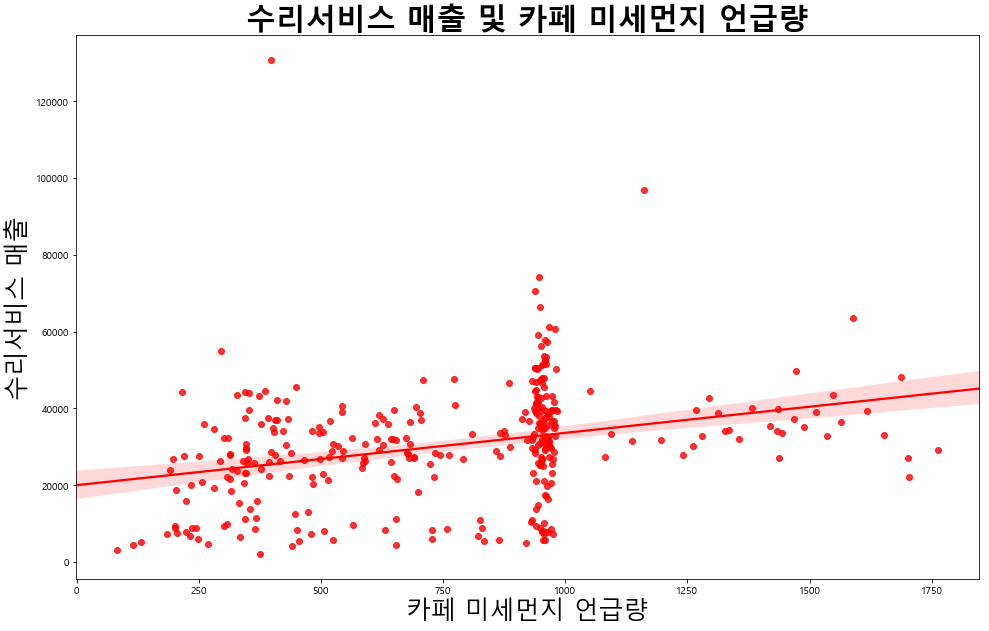

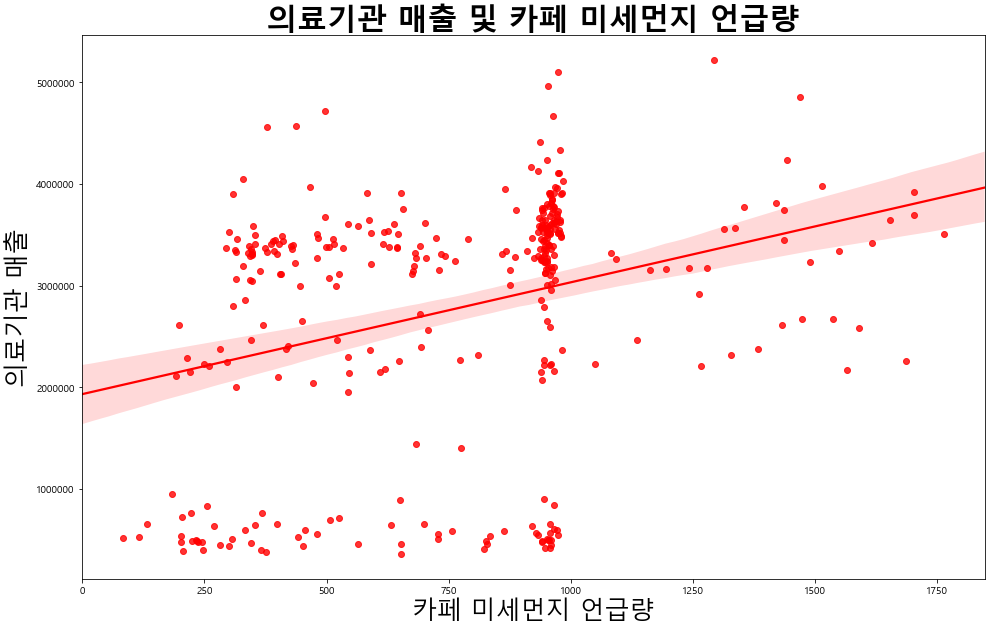

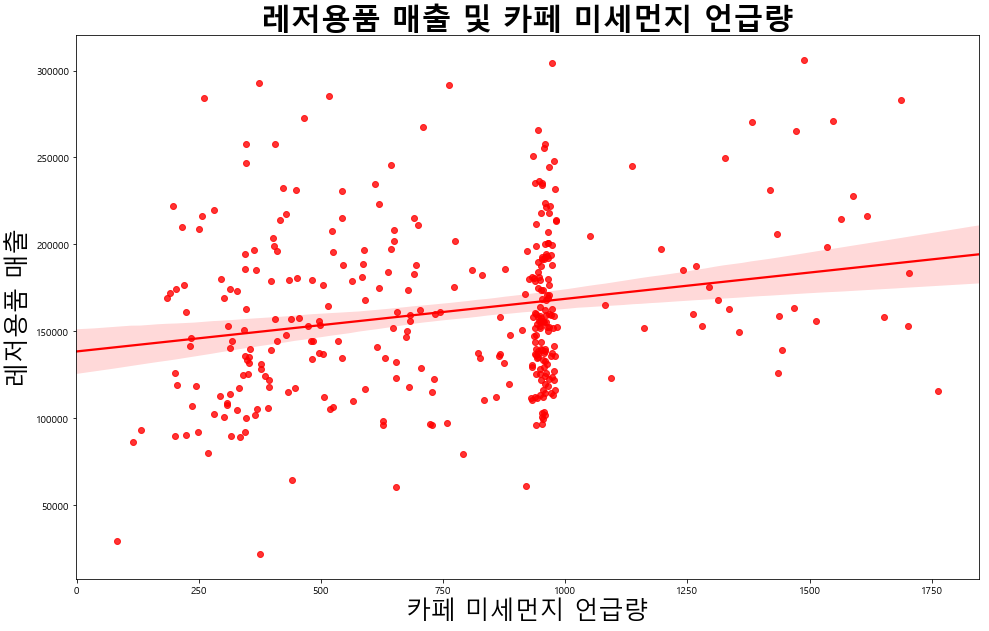

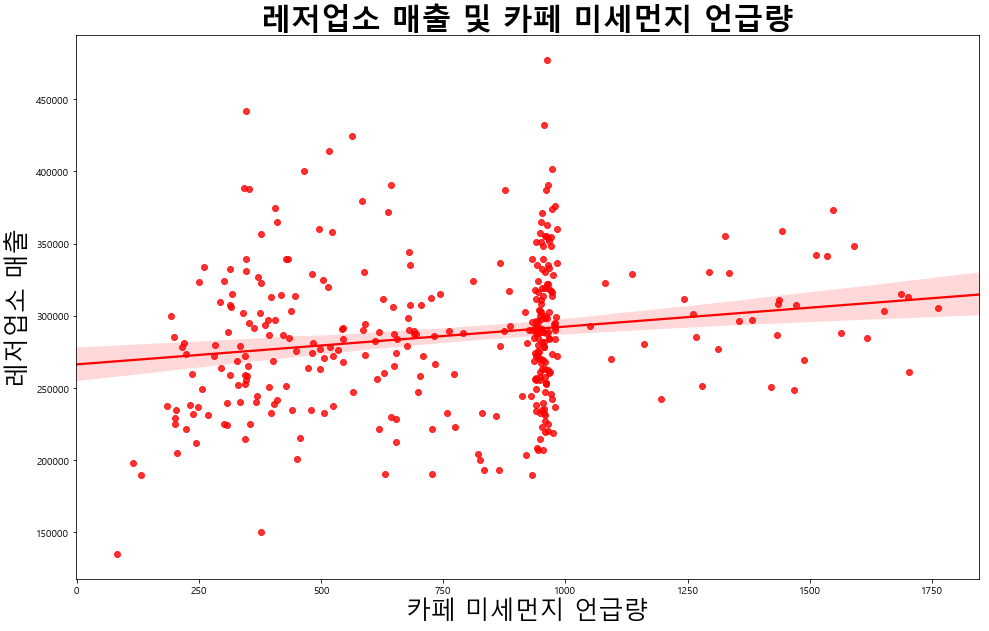

In [28]:
positive_list = {'MCT_CAT_CD_92' : '수리서비스 매출', 
                 'MCT_CAT_CD_70' : '의료기관 매출',
                 'MCT_CAT_CD_20' : '레저용품 매출',
                 'MCT_CAT_CD_21' : '레저업소 매출'}

for i in positive_list:
    
    plt.figure(figsize=[16.18, 10])    
    plt.title(positive_list[i]+' 및 카페 미세먼지 언급량', weight='bold', size=30)
    
    sns.regplot(x=df_sum['CAFE'], y=df_sum[i], color='red')
    
    plt.xlabel('카페 미세먼지 언급량', size=25)
    plt.ylabel(positive_list[i], size=25)

    
    # plt.savefig('img/CAFE_'+positive_list[i]+'.png')
    
    plt.show()
    


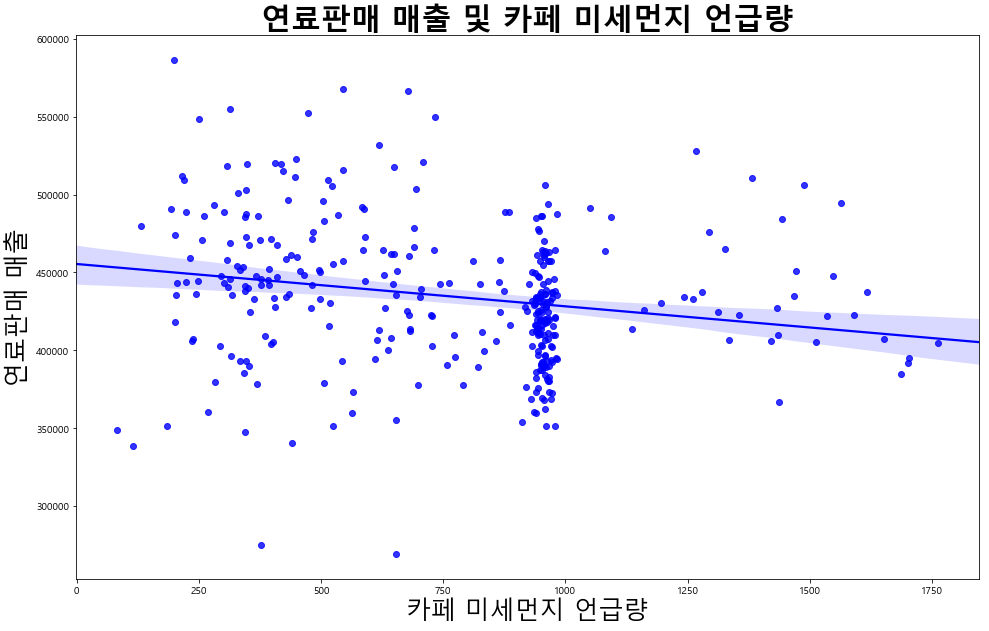

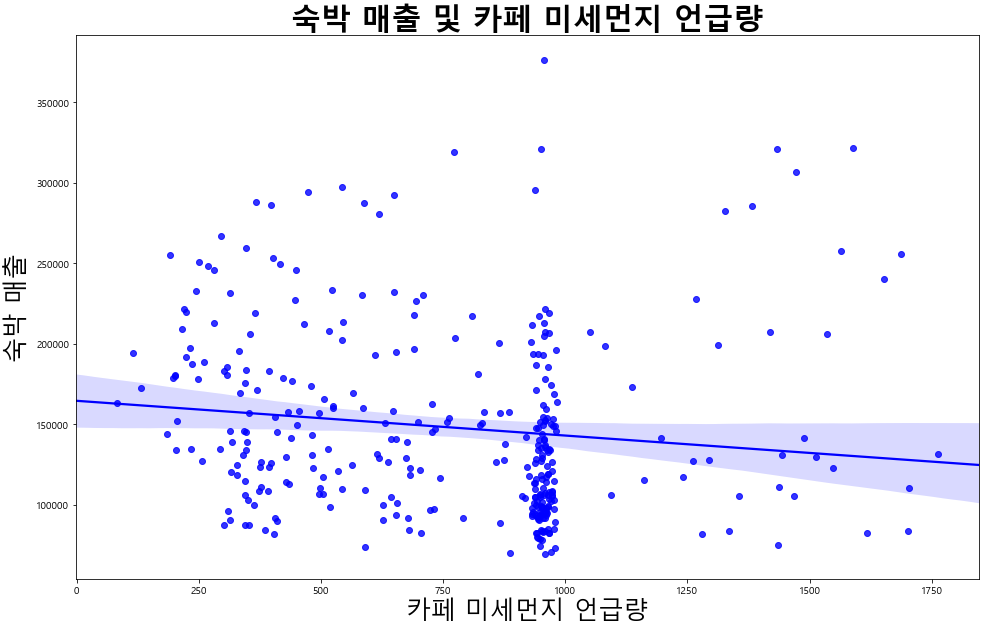

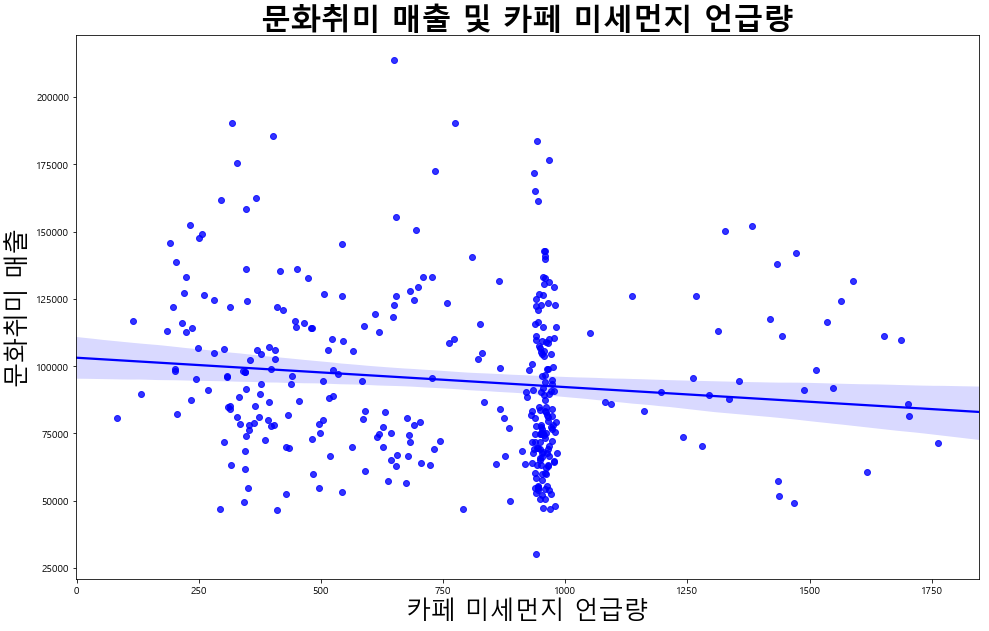

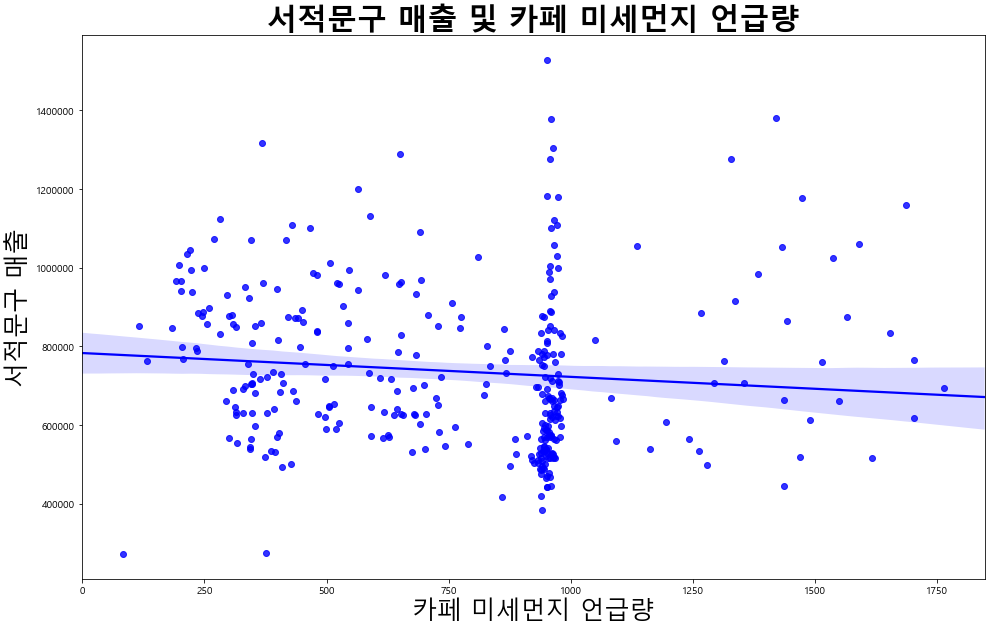

In [29]:
negative_list = {'MCT_CAT_CD_33' : '연료판매 매출', 
                 'MCT_CAT_CD_10' : '숙박 매출', 
                 'MCT_CAT_CD_22' : '문화취미 매출', 
                 'MCT_CAT_CD_50' : '서적문구 매출'}

for i in negative_list:
    
    plt.figure(figsize=[16.18, 10])    
    plt.title(negative_list[i]+' 및 카페 미세먼지 언급량', weight='bold', size=30)
    
    sns.regplot(x=df_sum['CAFE'], y=df_sum[i], color='blue')
    
    plt.xlabel('카페 미세먼지 언급량', size=25)
    plt.ylabel(negative_list[i], size=25)
    
    # plt.savefig('img/CAFE_'+negative_list[i]+'.png')
    
    plt.show()

## 종로구+노원구 합산 상관분석 결과 해석

**뉴스 미세먼지 언급량 높을 수록**

- (높음) 의료기관, 사무통신, 수리서비스, 레저업소
- (낮음) 숙박, 유통업, 문화취미, 연료판매

**블로그 미세먼지 언급량 높을 수록**

- (높음) 수리서비스, 의료기관, 레저업소, 주방용구
- (낮음) 숙박, 연료판매, 문화취미, 서적문구

**카페 미세먼지 언급량 높을 수록**

- (높음) 수리서비스, 의료기관, 레저용품, 레저업소
- (낮음) 연료판매, 숙박, 문화취미, 서적문구

## (클로즈업) 종로구 노원구 나눠서 상관분석

In [30]:
df_sum2 = df_sum[['DATE','QT','NEWS','BLOG','CAFE']]
df_sum2

,DATE,QT,NEWS,BLOG,CAFE
0,2018-04-01,2,515,977,940
1,2018-04-02,2,889,974,961
2,2018-04-03,2,858,970,952
3,2018-04-04,2,895,965,951
4,2018-04-05,2,865,106,948
5,2018-04-06,2,900,979,947
6,2018-04-07,2,417,967,959
7,2018-04-08,2,569,977,952
8,2018-04-09,2,900,899,955
9,2018-04-10,2,883,976,959


In [31]:
# 23개 카드매출 카테고리
mct_cat_list = list(set(df_card['MCT_CAT_CD']))
print(mct_cat_list)

[10, 20, 21, 22, 30, 31, 32, 33, 34, 35, 40, 42, 43, 44, 50, 52, 60, 62, 70, 71, 80, 81, 92]


In [32]:
# 2개 지역구 카테고리
mct_gu_list = list(set(df_card['GU_CD']))
print(mct_gu_list)

# 350 : 노원구
# 110 : 종로구

[350, 110]


In [33]:
daily_card2 = df_card.groupby(['GU_CD', 'MCT_CAT_CD', 'STD_DD'])['USE_AMT'].sum().to_frame().reset_index()
daily_card2['STD_DD']=pd.to_datetime(daily_card2['STD_DD'], format='%Y%m%d')
daily_card2.head()

,GU_CD,MCT_CAT_CD,STD_DD,USE_AMT
0,110,10,2018-04-01,139861
1,110,10,2018-04-02,85013
2,110,10,2018-04-03,105710
3,110,10,2018-04-04,72445
4,110,10,2018-04-05,92533


## 일별 데이터 집계

In [34]:
daily_sum = pd.DataFrame()

for gu in mct_gu_list:
    
    print(gu)
    
    date_list = pd.date_range(start='2018-04-01', end='2019-03-31')
    daily_gu_card = pd.DataFrame({'DATE':date_list})

    for cd in mct_cat_list:

        temp = pd.DataFrame({'DATE' : daily_card2[(daily_card2['MCT_CAT_CD']==cd) & (daily_card2['GU_CD']==gu)]['STD_DD'],
                            'GU_CD' : daily_card2[(daily_card2['MCT_CAT_CD']==cd) & (daily_card2['GU_CD']==gu)]['GU_CD'],
              'MCT_CAT_CD_'+str(cd) : daily_card2[(daily_card2['MCT_CAT_CD']==cd) & (daily_card2['GU_CD']==gu)]['USE_AMT']})
        
        daily_gu_card = pd.merge(daily_gu_card, temp, how='left')
    
    daily_sum = pd.concat([daily_sum, daily_gu_card])
    daily_sum.index = range(len(daily_sum))
    
daily_sum

350
110


,DATE,GU_CD,MCT_CAT_CD_10,MCT_CAT_CD_20,MCT_CAT_CD_21,MCT_CAT_CD_22,MCT_CAT_CD_30,MCT_CAT_CD_31,MCT_CAT_CD_32,MCT_CAT_CD_33,...,MCT_CAT_CD_44,MCT_CAT_CD_50,MCT_CAT_CD_52,MCT_CAT_CD_60,MCT_CAT_CD_62,MCT_CAT_CD_70,MCT_CAT_CD_71,MCT_CAT_CD_80,MCT_CAT_CD_81,MCT_CAT_CD_92
0,2018-04-01,350,31269,58409,164077,40437,21890.0,NaN,2885.0,364178,...,29595,101502,842.0,NaN,24501,145582,280287,1833379,159468,10236
1,2018-04-02,350,8356,74469,203602,24220,3449.0,2889.0,3547.0,408683,...,28998,87805,9346.0,5388.0,115142,1267814,225631,1200817,182162,33036
2,2018-04-03,350,10365,56905,205303,17697,8468.0,3999.0,19196.0,369522,...,20211,70669,2223.0,18559.0,54010,1324628,210332,1311857,173483,28567
3,2018-04-04,350,11809,46843,182988,16412,904.0,1440.0,4471.0,388287,...,21571,73751,2603.0,324.0,71477,1063327,212657,1343488,163218,39760
4,2018-04-05,350,14110,46500,133895,20330,13681.0,1646.0,5864.0,363901,...,18554,58508,13649.0,1314.0,43374,1082763,208842,1314575,168283,18142
5,2018-04-06,350,15787,51434,171345,26741,25955.0,520.0,7091.0,415005,...,26972,72738,4979.0,1438.0,63570,1234005,253672,1491269,179194,26841
6,2018-04-07,350,28828,64907,190985,41673,54922.0,573.0,3019.0,473695,...,27381,104134,2396.0,889.0,66776,1018566,353322,2042910,221131,35746
7,2018-04-08,350,35465,34987,170231,36973,28026.0,NaN,33.0,370043,...,15727,74836,395.0,NaN,5169,179917,246582,1678744,172981,3692
8,2018-04-09,350,13785,47450,145426,18565,5473.0,933.0,7391.0,437568,...,31887,73807,10191.0,332.0,92325,1444063,207504,1186123,167599,32691
9,2018-04-10,350,11790,38570,169749,23606,9849.0,574.0,10583.0,411506,...,13789,61679,2333.0,4818.0,59874,1217296,185662,1239594,176542,17207


In [35]:
# 결측치 처리
daily_sum = daily_sum.fillna(0)
daily_sum.isna().sum().to_frame()
daily_sum

,DATE,GU_CD,MCT_CAT_CD_10,MCT_CAT_CD_20,MCT_CAT_CD_21,MCT_CAT_CD_22,MCT_CAT_CD_30,MCT_CAT_CD_31,MCT_CAT_CD_32,MCT_CAT_CD_33,...,MCT_CAT_CD_44,MCT_CAT_CD_50,MCT_CAT_CD_52,MCT_CAT_CD_60,MCT_CAT_CD_62,MCT_CAT_CD_70,MCT_CAT_CD_71,MCT_CAT_CD_80,MCT_CAT_CD_81,MCT_CAT_CD_92
0,2018-04-01,350,31269,58409,164077,40437,21890.0,0.0,2885.0,364178,...,29595,101502,842.0,0.0,24501,145582,280287,1833379,159468,10236
1,2018-04-02,350,8356,74469,203602,24220,3449.0,2889.0,3547.0,408683,...,28998,87805,9346.0,5388.0,115142,1267814,225631,1200817,182162,33036
2,2018-04-03,350,10365,56905,205303,17697,8468.0,3999.0,19196.0,369522,...,20211,70669,2223.0,18559.0,54010,1324628,210332,1311857,173483,28567
3,2018-04-04,350,11809,46843,182988,16412,904.0,1440.0,4471.0,388287,...,21571,73751,2603.0,324.0,71477,1063327,212657,1343488,163218,39760
4,2018-04-05,350,14110,46500,133895,20330,13681.0,1646.0,5864.0,363901,...,18554,58508,13649.0,1314.0,43374,1082763,208842,1314575,168283,18142
5,2018-04-06,350,15787,51434,171345,26741,25955.0,520.0,7091.0,415005,...,26972,72738,4979.0,1438.0,63570,1234005,253672,1491269,179194,26841
6,2018-04-07,350,28828,64907,190985,41673,54922.0,573.0,3019.0,473695,...,27381,104134,2396.0,889.0,66776,1018566,353322,2042910,221131,35746
7,2018-04-08,350,35465,34987,170231,36973,28026.0,0.0,33.0,370043,...,15727,74836,395.0,0.0,5169,179917,246582,1678744,172981,3692
8,2018-04-09,350,13785,47450,145426,18565,5473.0,933.0,7391.0,437568,...,31887,73807,10191.0,332.0,92325,1444063,207504,1186123,167599,32691
9,2018-04-10,350,11790,38570,169749,23606,9849.0,574.0,10583.0,411506,...,13789,61679,2333.0,4818.0,59874,1217296,185662,1239594,176542,17207


## 병합

In [36]:
df_merge = pd.merge(daily_sum, df_sum2, how='left')

In [37]:
df_merge = pd.merge(daily_sum, df_sum2, how='left')
df_merge = df_merge[[
                    'GU_CD','DATE','QT','NEWS','BLOG','CAFE',
                    'MCT_CAT_CD_10', 'MCT_CAT_CD_20', 'MCT_CAT_CD_21',
                    'MCT_CAT_CD_22', 'MCT_CAT_CD_30', 'MCT_CAT_CD_31', 'MCT_CAT_CD_32',
                    'MCT_CAT_CD_33', 'MCT_CAT_CD_34', 'MCT_CAT_CD_35', 'MCT_CAT_CD_40',
                    'MCT_CAT_CD_42', 'MCT_CAT_CD_43', 'MCT_CAT_CD_44', 'MCT_CAT_CD_50',
                    'MCT_CAT_CD_52', 'MCT_CAT_CD_60', 'MCT_CAT_CD_62', 'MCT_CAT_CD_70',
                    'MCT_CAT_CD_71', 'MCT_CAT_CD_80', 'MCT_CAT_CD_81', 'MCT_CAT_CD_92'
                   ]]
df_merge['GU_CD']=pd.Categorical(df_merge['GU_CD'])
df_merge['QT']=pd.Categorical(df_merge['QT'])
df_merge = df_merge.dropna()
df_merge.index = range(len(df_merge))

In [38]:
df_merge

,GU_CD,DATE,QT,NEWS,BLOG,CAFE,MCT_CAT_CD_10,MCT_CAT_CD_20,MCT_CAT_CD_21,MCT_CAT_CD_22,...,MCT_CAT_CD_44,MCT_CAT_CD_50,MCT_CAT_CD_52,MCT_CAT_CD_60,MCT_CAT_CD_62,MCT_CAT_CD_70,MCT_CAT_CD_71,MCT_CAT_CD_80,MCT_CAT_CD_81,MCT_CAT_CD_92
0,350,2018-04-01,2.0,515.0,977.0,940.0,31269,58409,164077,40437,...,29595,101502,842.0,0.0,24501,145582,280287,1833379,159468,10236
1,350,2018-04-02,2.0,889.0,974.0,961.0,8356,74469,203602,24220,...,28998,87805,9346.0,5388.0,115142,1267814,225631,1200817,182162,33036
2,350,2018-04-03,2.0,858.0,970.0,952.0,10365,56905,205303,17697,...,20211,70669,2223.0,18559.0,54010,1324628,210332,1311857,173483,28567
3,350,2018-04-04,2.0,895.0,965.0,951.0,11809,46843,182988,16412,...,21571,73751,2603.0,324.0,71477,1063327,212657,1343488,163218,39760
4,350,2018-04-05,2.0,865.0,106.0,948.0,14110,46500,133895,20330,...,18554,58508,13649.0,1314.0,43374,1082763,208842,1314575,168283,18142
5,350,2018-04-06,2.0,900.0,979.0,947.0,15787,51434,171345,26741,...,26972,72738,4979.0,1438.0,63570,1234005,253672,1491269,179194,26841
6,350,2018-04-07,2.0,417.0,967.0,959.0,28828,64907,190985,41673,...,27381,104134,2396.0,889.0,66776,1018566,353322,2042910,221131,35746
7,350,2018-04-08,2.0,569.0,977.0,952.0,35465,34987,170231,36973,...,15727,74836,395.0,0.0,5169,179917,246582,1678744,172981,3692
8,350,2018-04-09,2.0,900.0,899.0,955.0,13785,47450,145426,18565,...,31887,73807,10191.0,332.0,92325,1444063,207504,1186123,167599,32691
9,350,2018-04-10,2.0,883.0,976.0,959.0,11790,38570,169749,23606,...,13789,61679,2333.0,4818.0,59874,1217296,185662,1239594,176542,17207


In [39]:
corr2 = df_merge.corr(method = 'pearson')

In [40]:
corr2['NEWS'].to_frame().sort_values('NEWS', ascending=False)

,NEWS
NEWS,1.000000
CAFE,0.635740
MCT_CAT_CD_70,0.445662
BLOG,0.410332
MCT_CAT_CD_52,0.217325
MCT_CAT_CD_92,0.215707
MCT_CAT_CD_32,0.175387
MCT_CAT_CD_60,0.147395
MCT_CAT_CD_31,0.140789
MCT_CAT_CD_21,0.140167


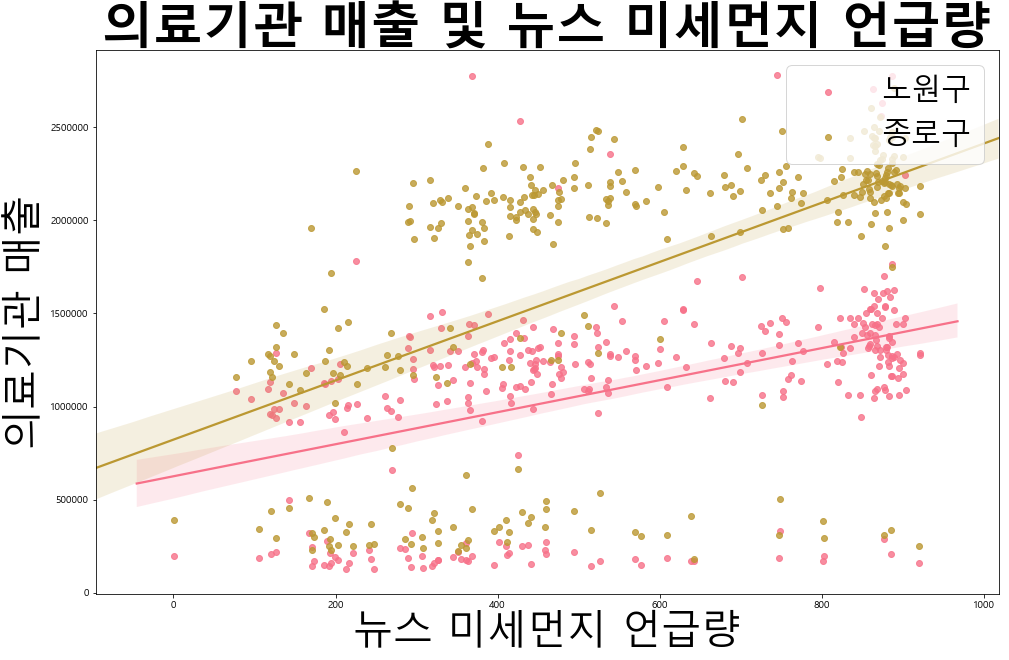

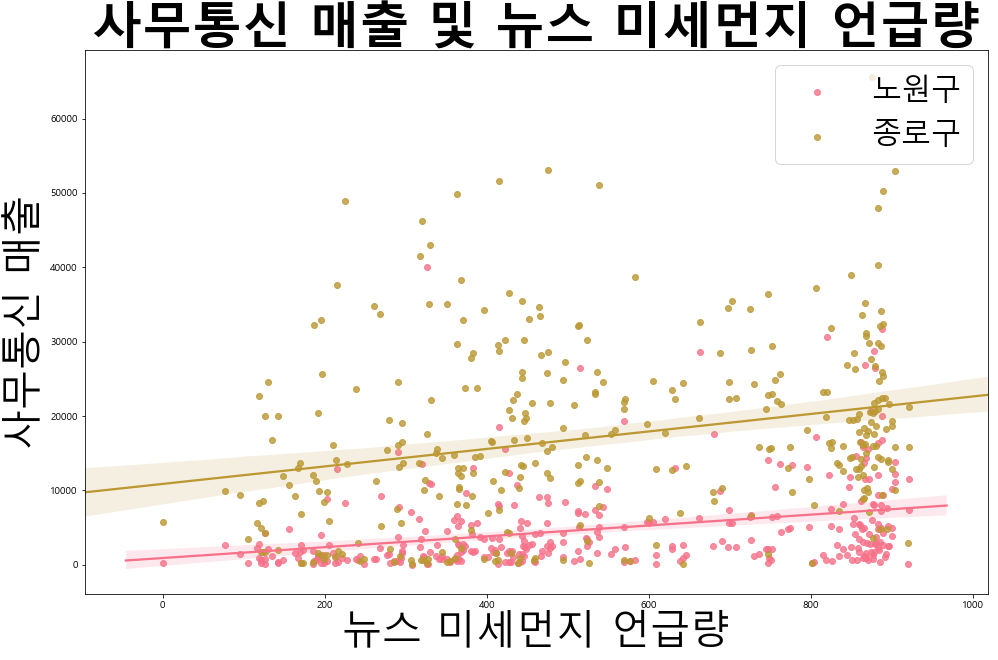

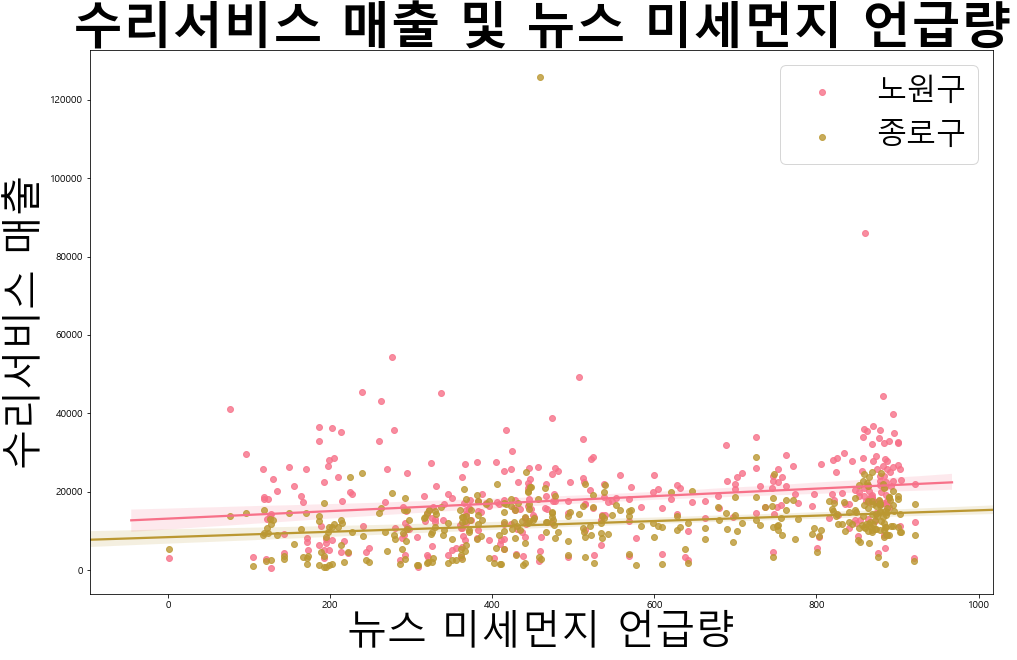

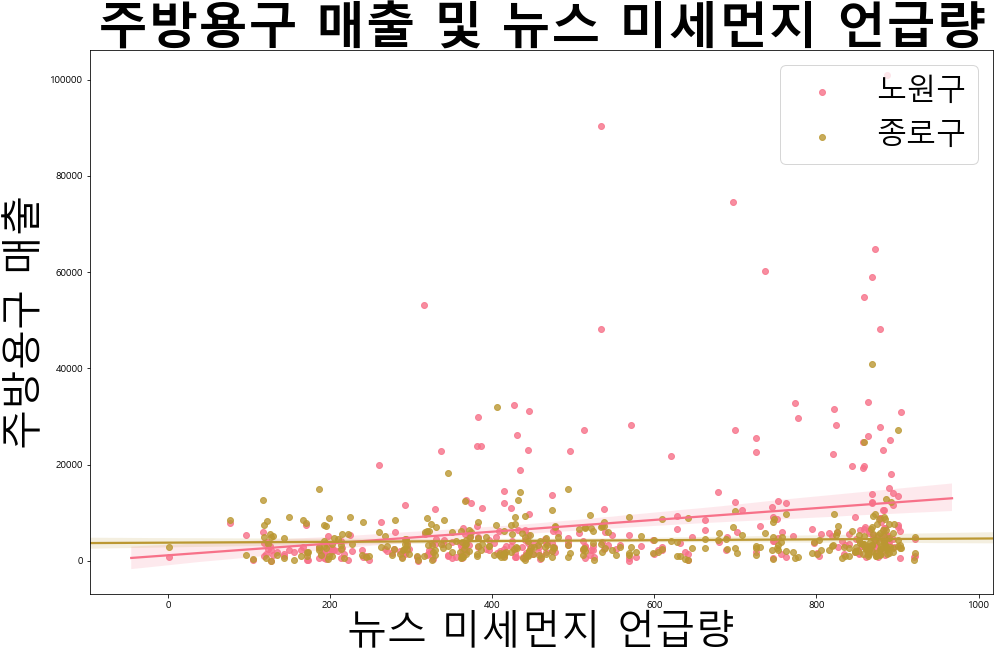

In [65]:
positive_list = {'MCT_CAT_CD_70' : '의료기관 매출', 
                 'MCT_CAT_CD_52' : '사무통신 매출',
                 'MCT_CAT_CD_92' : '수리서비스 매출',
                 'MCT_CAT_CD_32' : '주방용구 매출'}

df_merge_nowon = df_merge[df_merge['GU_CD']==350]
df_merge_jongno = df_merge[df_merge['GU_CD']==110]
sns.set_palette("husl")
for i in positive_list:
    
    plt.figure(figsize=[16.18, 10])    
    plt.title(positive_list[i]+' 및 뉴스 미세먼지 언급량', weight='bold', size=50)
    
    sns.regplot(x=df_merge_nowon['NEWS'], y=df_merge_nowon[i], label='노원구')
    sns.regplot(x=df_merge_jongno['NEWS'], y=df_merge_jongno[i], label='종로구')
    
    plt.legend(loc='upper right', fontsize=30)
    plt.xlabel('뉴스 미세먼지 언급량', size=40)
    plt.ylabel(positive_list[i], size=40)

    
    plt.savefig('img/클로즈업_NEWS_'+positive_list[i]+'.png')
    
    plt.show()

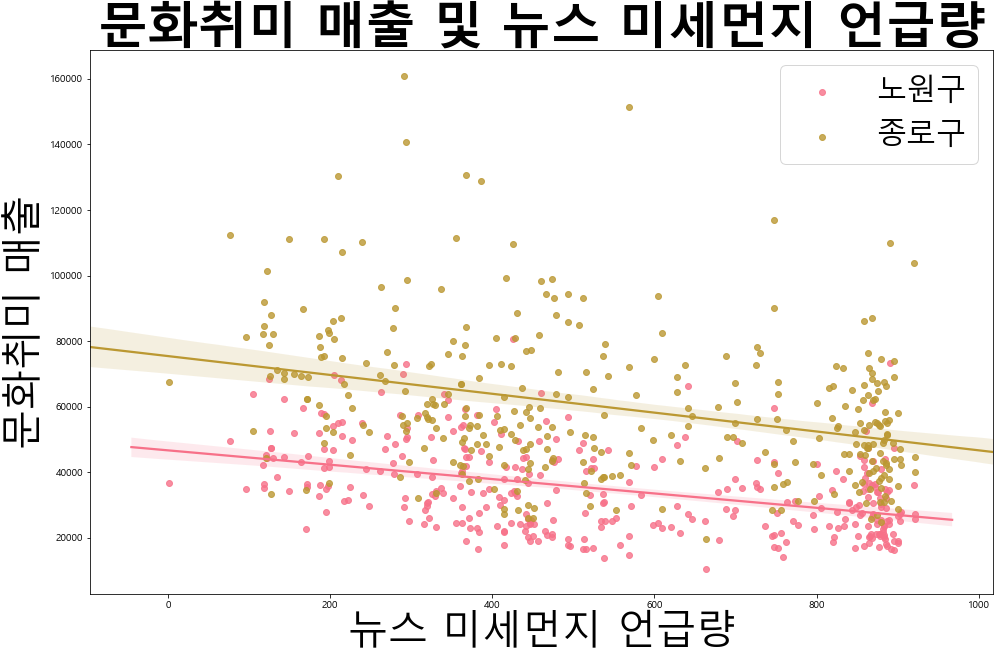

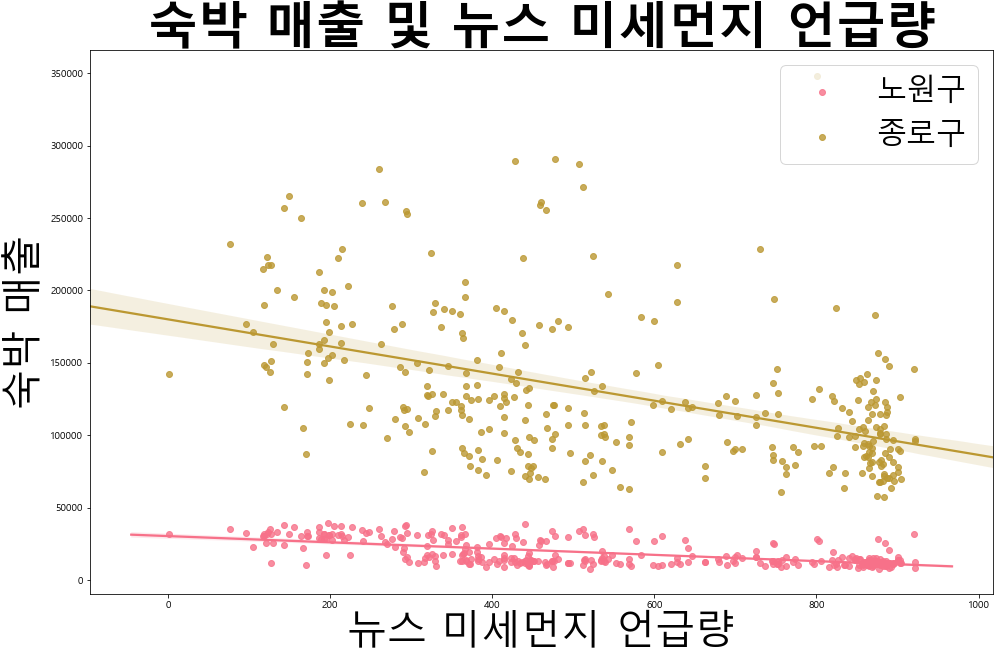

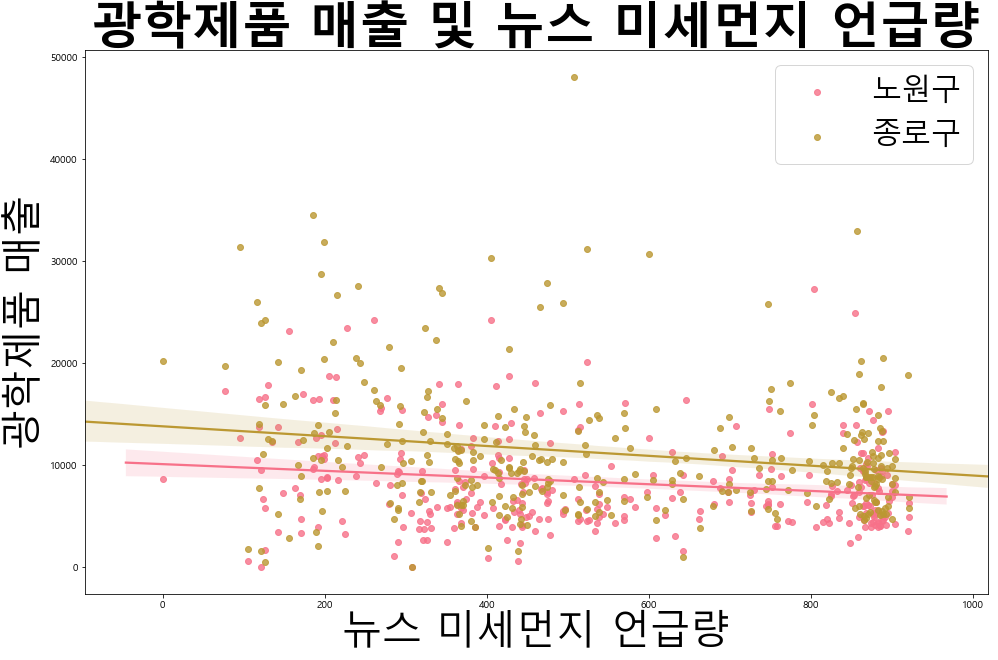

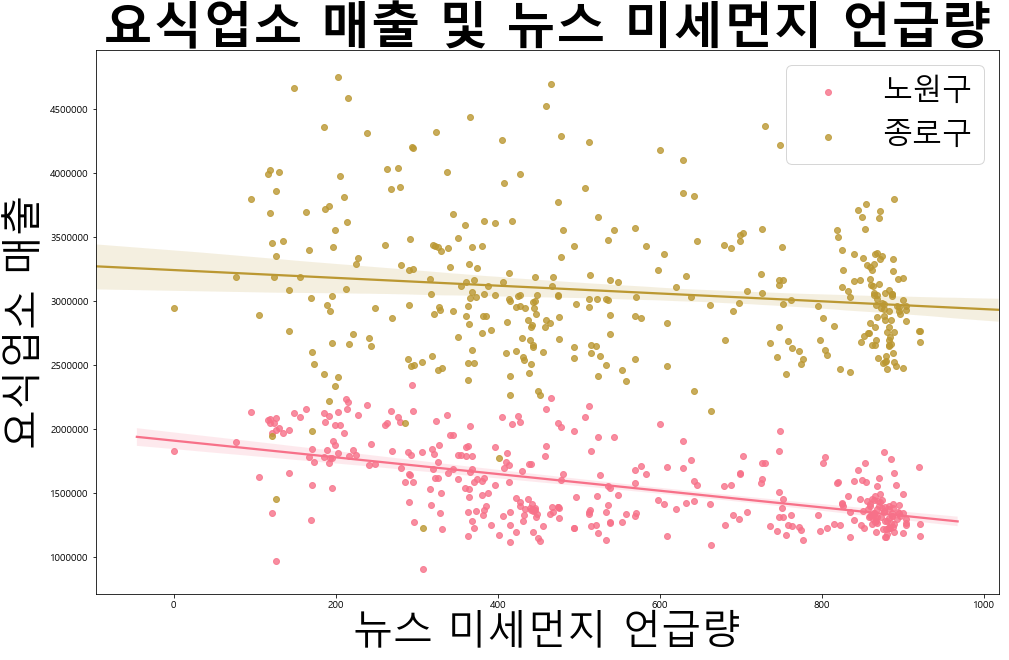

In [66]:
negative_list = {'MCT_CAT_CD_22' : '문화취미 매출', 
                 'MCT_CAT_CD_10' : '숙박 매출',
                 'MCT_CAT_CD_34' : '광학제품 매출',
                 'MCT_CAT_CD_80' : '요식업소 매출'}

df_merge_nowon = df_merge[df_merge['GU_CD']==350]
df_merge_jongno = df_merge[df_merge['GU_CD']==110]
sns.set_palette("husl")

for i in negative_list:
    
    plt.figure(figsize=[16.18, 10])    
    plt.title(negative_list[i]+' 및 뉴스 미세먼지 언급량', weight='bold', size=50)
    
    sns.regplot(x=df_merge_nowon['NEWS'], y=df_merge_nowon[i], label='노원구')
    sns.regplot(x=df_merge_jongno['NEWS'], y=df_merge_jongno[i], label='종로구')
    
    plt.legend(loc='upper right', fontsize=30)
    plt.xlabel('뉴스 미세먼지 언급량', size=40)
    plt.ylabel(negative_list[i], size=40)

    
    plt.savefig('img/클로즈업_NEWS_'+negative_list[i]+'.png')
    
    plt.show()